__<h1><center><font color='lightblue'>SLOAN DIGITAL SKY SURVEY (DR 18) EDA</center></h1>__

Manuel Ramos Alascio

Diciembre 2025 - Enero 2026

IMF Smart School, Data Science & Business Analytics

# <font color=red >__I. APROXIMACIÓN INICIAL__

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#   Cargamos el CSV
df_virgen = pd.read_csv('SDSS_DR18.csv')

In [7]:
print(df_virgen.info())
print(df_virgen.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   objid        100000 non-null  float64
 1   specobjid    100000 non-null  float64
 2   ra           100000 non-null  float64
 3   dec          100000 non-null  float64
 4   u            100000 non-null  float64
 5   g            100000 non-null  float64
 6   r            100000 non-null  float64
 7   i            100000 non-null  float64
 8   z            100000 non-null  float64
 9   run          100000 non-null  int64  
 10  rerun        100000 non-null  int64  
 11  camcol       100000 non-null  int64  
 12  field        100000 non-null  int64  
 13  plate        100000 non-null  int64  
 14  mjd          100000 non-null  int64  
 15  fiberid      100000 non-null  int64  
 16  petroRad_u   100000 non-null  float64
 17  petroRad_g   100000 non-null  float64
 18  petroRad_i   100000 non-n

In [8]:
df_virgen.shape

(100000, 43)

In [9]:
df_virgen.isnull().sum().sum()

np.int64(0)

In [10]:
df_virgen["class"].unique()

array(['GALAXY', 'STAR', 'QSO'], dtype=object)

In [11]:
df_virgen["class"].value_counts(normalize=True)*100

class
GALAXY    52.343
STAR      37.232
QSO       10.425
Name: proportion, dtype: float64

In [12]:
df_virgen.columns

Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run',
       'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid', 'petroRad_u',
       'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z',
       'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u',
       'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'class'],
      dtype='object')

Para empezar, hemos inspeccionado las características más esenciales del dataset:
+ Tiene 100,000 filas y 43 columnas
+ __NO TIENE VALORES NULOS__
+ El dataset clasifica todas las observaciones en 3 clases diferentes, y se distribuyen aproximadamente así:
    + __Galaxias__ - 52% de las observaciones
    + __Estrellas__ - 37% de las observaciones
    + __Quasars__ - 11% de las observaciones
+ _Columnas_:

    Vale la pena explicar por encima qué nos dice cada una, o cada grupo de columnas:
    + __objid y scopebjid__: identificadores del objeto a nivel fotográfico y espectroscópico, respectivamente.
    si un objeto tiene ambos, significará que se le ha tomado una foto (objid) y que también se ha analizado su luz en detalle(scopebjid)
    + __ra y dec__: Right Ascension (longitud celeste) y Declination (latitud celeste) --> coordenadas celestes
    + __u, g, r, i, z__: Fotometría de bandas: miden el brillo de cada objeto en 5 filtros diferentes: ultravioleta, verde, rojo, infrarrojo cercano e infrarrojo lejano, respectivamente. Menor magnitud: u, mayor magnitud:z; en astronomía una menor mangitud significa mayor brillo (brillo y magnitud son inversamente proporcionales)
    + __run, rerun, camcol, field__: Datos sobre cómo el telescopio tomó la imagen (ingeniería del telescopio)
    + __petroRad, petroFlux, petroR50__: medidas estructurales de Petrosian. Respectivamente, representan:
    radio de Petrosian, que indica el tamaño aparente del objeto en el cielo para cada filtro; Flujo de luz dentro del radio de Petrosian para cada filtro, y el radio que contiene el 50% de la luz de cada objeto para cada filtro de luz.
    + __PsfMag y expAB__: Forma y perfil de cada objeto. Sirve para clasificarlo.
    + __plate, fiberid__: identidad de la placa e id de la fibra óptica usada por el telescopio.
    + __mjd__: fecha en la que se observó cada objeto.
    + __redshift__: desplazamiento al rojo de cada objeto. La columna más importannte para la espectroscopía. Al analizarla, podemos saber a qué distancia está un objeto y a qué velocidad se aleja o acerca a la Tierra.
    + __class__: clasificación del objeto: estrella, cuásar o galaxia.

## __I.I. GESTIÓN DE NULOS__ 

En la misma página de kaggle nos avisan de que sí, no existen nulos como tal, pero este dataset usa la "muletilla" -9999 en numerosas ocasiones cuando ha habido un error de cualquier tipo en una medición. Lo lógico es transformarlos en NAs, ver qué cantidad de ellos hay y qué hacer con ellos en cada columna.

Vamos a hacer un inplace true.

In [13]:
df_virgen.replace(-9999, np.nan, inplace=True)

In [14]:
df_virgen.isnull().sum().sum()

np.int64(235)

Tenemos 235 valores nulos en un dataset con 4,300,000 datos. Es irrelevante. Pero vamos a analizar cómo se distribuyen:

In [15]:
# buscamos filas con nulos.
filas_con_nulos= df_virgen[df_virgen.isnull().any(axis=1)]
len(filas_con_nulos)

187

In [16]:
# Tenemos 235 valores nulos distribuidos en 187 filas. En un dataset de 100,000 filas, representa el 0.187% de los datos.
# Lo más lógico parece eliminarlos sin más, pero antes vamos a ver a qué clases afectan más estos nulos:
filas_con_nulos["class"].value_counts(normalize=True)*100

class
GALAXY    72.727273
STAR      21.390374
QSO        5.882353
Name: proportion, dtype: float64

Vemos que afectan, en orden de importancia, a galaxias, estrellas y cuásares.
Las galaxias son el grupo más numeroso de observaciones (~50%) y le afectan ~70% nulos.

estrellas representan ~20% nulos siendo ~40% obs. 

cuásares representan ~10% obs, afectados por ~10% nulos.

Como los nulos:
1. son muy poco relevantes en número (~0.187% de las filas)
2. no afectan significativamente a ninguna clase de manera tan desproporcionada como para que se pierda información relevante

vamos a borrar las filas que contienen nulos.

In [17]:
df_lim= df_virgen.dropna()

print(f"Dataset original: {df_virgen.shape[0]} filas")
print(f"Dataset limpio: {df_lim.shape[0]} filas")

Dataset original: 100000 filas
Dataset limpio: 99813 filas


## __I.II. COLORES__
Vamos a trabajar sobre las columnas de color u, g, r, i, z
Estas sólamente miden el brillo de cada objeto, son bandas de brillo.
Para que un dataset como este pueda arrojar conclusiones más interesantes, podemos crear variables de color, que son resultado de operar con las bandas de brillo.
+ __Firma ultravioleta__ (u-g): filtro esencial para encontrar cuásares, ya que emiten una cantidad enorme de energía UV.
+ __Índice de madurez estelar__(g-r): muy útil para medir la edad de las galaxias. Un valor bajo (azul) nos indica galaxias con formación estelar activa (bebés de galaxias), mientras que un valor alto (rojo) nos revela galaxias elípticas masivas y antiguas.
+ __Gradiente de enrojecimiento__(r-i): para medir distancias o interferencia de polvo.
No es exactamente como el redshift pese a estar muy relacionados, puesto que esto es un _color_ y nuestra columna redshift mide _velocidad y distancia_
+ __Sonda de infrarrojo profundo__(i-z): cuando un objeto está masivamente lejos (redshift muy alto), su luz visible desaparece y solo se puede ver en el espectro infrarrojo. Si un objeto tiene un valor muy alto en este índice pero casi no se ve en u o g, hemos encontrado un objeto del universo temprano.

Vamos a crear estas columnas para más tarde trabajar sobre ellas:

In [18]:
df_lim["Firma UV (u-g)"] = df_lim["u"] - df_lim["g"]
df_lim["ÍndMadEst (g-r)"] = df_lim["g"] - df_lim["r"]
df_lim["GradEnr (r-i)"] = df_lim["r"] - df_lim["i"]
df_lim["SondaInfrProf (i-z)"] = df_lim["i"] - df_lim["z"]

C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\1641877736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim["Firma UV (u-g)"] = df_lim["u"] - df_lim["g"]
C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\1641877736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim["ÍndMadEst (g-r)"] = df_lim["g"] - df_lim["r"]
C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\1641877736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [19]:
df_lim

objid     specobjid          ra        dec         u         g  \
0      1.240000e+18  3.240000e+17  184.950869   0.733068  18.87062  17.59612   
1      1.240000e+18  3.250000e+17  185.729201   0.679704  19.59560  19.92153   
2      1.240000e+18  3.240000e+17  185.687690   0.823480  19.26421  17.87891   
3      1.240000e+18  2.880000e+18  185.677904   0.768362  19.49739  17.96166   
4      1.240000e+18  2.880000e+18  185.814763   0.776940  18.31519  16.83033   
...             ...           ...         ...        ...       ...       ...   
99995  1.240000e+18  3.580000e+18  154.077143  55.614066  19.39861  18.35476   
99996  1.240000e+18  3.580000e+18  154.067926  55.635794  19.07703  18.05159   
99997  1.240000e+18  1.070000e+18  153.897018  55.712582  19.07982  17.51349   
99998  1.240000e+18  6.950000e+17  235.656141  56.297044  17.27528  16.41704   
99999  1.240000e+18  6.950000e+17  235.821749  56.400331  17.90598  16.86471   

              r         i         z   run  ...   expAB_g   expAB_r   expAB_i  \
0      17.11245  16.83899  16.70908   756  ...  0.518483  0.520474  0.508502   
1      20.34448  20.66213  20.59599   756  ...  0.531728  0.403072  0.999874   
2      17.09593  16.65159  16.35329   756  ...  0.743386  0.770897  0.778642   
3      17.41269  17.20545  17.11567   756  ...  0.787760  0.745611  0.399718   
4      16.26352  16.06320  15.97527   756  ...  0.834450  0.723526  0.712259   
...         ...       ...       ...   ...  ...       ...       ...       ...   
99995  18.00348  17.89408  17.81222  2243  ...  0.999791  0.794516  0.802310   
99996  17.78332  17.68976  17.66209  2243  ...  0.999912  0.999776  0.999682   
99997  16.64037  16.24183  15.91180  2243  ...  0.760212  0.769053  0.772322   
99998  16.11662  15.98858  15.97745  2206  ...  0.199795  0.481020  0.650008   
99999  16.51673  16.35695  16.22508  2206  ...  0.415040  0.437322  0.437766   

        expAB_z  redshift   class  Firma UV (u-g)  ÍndMadEst (g-r)  \
0      0.488969  0.041691  GALAXY         1.27450          0.48367   
1      0.189495 -0.000814    STAR        -0.32593         -0.42295   
2      0.736771  0.113069  GALAXY         1.38530          0.78298   
3      0.986137  0.000087    STAR         1.53573          0.54897   
4      0.527055  0.000018    STAR         1.48486          0.56681   
...         ...       ...     ...             ...              ...   
99995  0.537987 -0.000101    STAR         1.04385          0.35128   
99996  0.544329 -0.000352    STAR         1.02544          0.26827   
99997  0.845797  0.117501  GALAXY         1.56633          0.87312   
99998  0.822835 -0.000400    STAR         0.85824          0.30042   
99999  0.446210  0.014457  GALAXY         1.04127          0.34798   

       GradEnr (r-i)  SondaInfrProf (i-z)  
0            0.27346              0.12991  
1           -0.31765              0.06614  
2            0.44434              0.29830  
3            0.20724              0.08978  
4            0.20032              0.08793  
...              ...                  ...  
99995        0.10940              0.08186  
99996        0.09356              0.02767  
99997        0.39854              0.33003  
99998        0.12804              0.01113  
99999        0.15978              0.13187  

[99813 rows x 47 columns]

## __I.III. Columnas interesantes__

Vamos a construir varias columnas muy interesantes a nivel físico para trabajar más tarde con el dataset.

+ __Indicador puntual__ (psfMag_r -r): separador definitivo entre estrellas y galaxias. 

Las estrellas son puntos de luz perfectos; por tanto, su brillo captado como punto (psfMag) y su brillo total (r) son casi iguales, por lo que la diferencia será cercana a 0

Las galaxias son objetos muy extendidos en el espacio en una foto. Su brillo total es mucho mayor que lo que el telescopio capta en su punto central, por lo que se perciben como una nube. La diferencia será un valor alto

+ __Indice de Concentración__ (R50 / Rad): El ratio entre el radio que contiene el 50% de la luz (petroR50_r) y el radio total del objeto (petroRad_r).

Los cuásares y las estrellas tienen una concentración alta (la luz está en el centro).
Las Galaxias tienen perfiles más dispersos.
más tarde nos va a ayudar a diferenciar tipos de galaxias (espirales vs elípticas, siendo las elípticas son mucho más concentradas)

+ __Error Fotométrico__(psfMag_u - u): cuando los modelos de perfil de luz (PSF vs Petro) no coinciden en la banda más ruidosa (u), es un indicador de la dificultad de medición o de que el objeto tiene una estructura compleja

In [20]:
df_lim["SeparadorEstelar (psf-r)"] = df_lim["psfMag_r"] - df_lim["r"]
df_lim["ÍndConcentracion (petroR50_r/petroRad_r)"] = df_lim["petroR50_r"] / (df_lim["petroRad_r"] + 1e-6)
df_lim["ErrFot_u (psf-u)"] = df_lim["psfMag_u"] - df_lim["u"]

# Vamos también a reorganizar la columna "class" para que quede al final en el DF:
columnas = [col for col in df_lim.columns if col != "class"]
columnas.append("class")
df_lim = df_lim[columnas]

C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\2325525193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim["SeparadorEstelar (psf-r)"] = df_lim["psfMag_r"] - df_lim["r"]
C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\2325525193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim["ÍndConcentracion (petroR50_r/petroRad_r)"] = df_lim["petroR50_r"] / (df_lim["petroRad_r"] + 1e-6)
C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\2325525193.py:3: SettingWithCopyWarning: 
A value is trying 

In [21]:
df_lim

objid     specobjid          ra        dec         u         g  \
0      1.240000e+18  3.240000e+17  184.950869   0.733068  18.87062  17.59612   
1      1.240000e+18  3.250000e+17  185.729201   0.679704  19.59560  19.92153   
2      1.240000e+18  3.240000e+17  185.687690   0.823480  19.26421  17.87891   
3      1.240000e+18  2.880000e+18  185.677904   0.768362  19.49739  17.96166   
4      1.240000e+18  2.880000e+18  185.814763   0.776940  18.31519  16.83033   
...             ...           ...         ...        ...       ...       ...   
99995  1.240000e+18  3.580000e+18  154.077143  55.614066  19.39861  18.35476   
99996  1.240000e+18  3.580000e+18  154.067926  55.635794  19.07703  18.05159   
99997  1.240000e+18  1.070000e+18  153.897018  55.712582  19.07982  17.51349   
99998  1.240000e+18  6.950000e+17  235.656141  56.297044  17.27528  16.41704   
99999  1.240000e+18  6.950000e+17  235.821749  56.400331  17.90598  16.86471   

              r         i         z   run  ...   expAB_z  redshift  \
0      17.11245  16.83899  16.70908   756  ...  0.488969  0.041691   
1      20.34448  20.66213  20.59599   756  ...  0.189495 -0.000814   
2      17.09593  16.65159  16.35329   756  ...  0.736771  0.113069   
3      17.41269  17.20545  17.11567   756  ...  0.986137  0.000087   
4      16.26352  16.06320  15.97527   756  ...  0.527055  0.000018   
...         ...       ...       ...   ...  ...       ...       ...   
99995  18.00348  17.89408  17.81222  2243  ...  0.537987 -0.000101   
99996  17.78332  17.68976  17.66209  2243  ...  0.544329 -0.000352   
99997  16.64037  16.24183  15.91180  2243  ...  0.845797  0.117501   
99998  16.11662  15.98858  15.97745  2206  ...  0.822835 -0.000400   
99999  16.51673  16.35695  16.22508  2206  ...  0.446210  0.014457   

       Firma UV (u-g)  ÍndMadEst (g-r)  GradEnr (r-i)  SondaInfrProf (i-z)  \
0             1.27450          0.48367        0.27346              0.12991   
1            -0.32593         -0.42295       -0.31765              0.06614   
2             1.38530          0.78298        0.44434              0.29830   
3             1.53573          0.54897        0.20724              0.08978   
4             1.48486          0.56681        0.20032              0.08793   
...               ...              ...            ...                  ...   
99995         1.04385          0.35128        0.10940              0.08186   
99996         1.02544          0.26827        0.09356              0.02767   
99997         1.56633          0.87312        0.39854              0.33003   
99998         0.85824          0.30042        0.12804              0.01113   
99999         1.04127          0.34798        0.15978              0.13187   

       SeparadorEstelar (psf-r)  ÍndConcentracion (petroR50_r/petroRad_r)  \
0                       2.39079                                  0.509192   
1                       0.00043                                  0.513906   
2                       1.45239                                  0.485154   
3                       0.01003                                  0.513552   
4                       0.02228                                  0.517475   
...                         ...                                       ...   
99995                   0.01124                                  0.506933   
99996                   0.01401                                  0.511146   
99997                   1.50755                                  0.439575   
99998                  -0.01282                                  0.509720   
99999                   2.37008                                  0.477812   

       ErrFot_u (psf-u)   class  
0               2.24829  GALAXY  
1              -0.00615    STAR  
2               1.55869  GALAXY  
3              -0.00033    STAR  
4               0.01986    STAR  
...                 ...     ...  
99995          -0.01061    STAR  
99996          -0.00787    STAR  
99997           1.62457  GALAXY  
99998     

## __I.IV. Validación estadística__

Vamos a comprobar que las nuevas columnas que hemos creado son estadísticamente significativas.
Si las medias de las nuevas variables presentan diferencias significativas entre clases (estrellas, galaxias, cuásares)
significa que sí aportan información.

In [22]:
#   Definimos una lista con las nuevas variables y el redshift
vars_valid = [
    "Firma UV (u-g)",
    "ÍndMadEst (g-r)",
    "GradEnr (r-i)",
    "SondaInfrProf (i-z)",
    "SeparadorEstelar (psf-r)",
    "ÍndConcentracion (petroR50_r/petroRad_r)",
    "ErrFot_u (psf-u)",
    "redshift"
]

#   Agrupamos por la columna "class" y calculamos la media. .T para transponer la tabla
valid_estad = df_lim.groupby("class")[vars_valid].mean().T

#   Mostramos el resultado
print("Validación Estadística: Media de las variables por Clase")
display(valid_estad)

Validación Estadística: Media de las variables por Clase


class                                       GALAXY       QSO      STAR
Firma UV (u-g)                            1.452816  0.277384  1.196306
ÍndMadEst (g-r)                           0.693979  0.186923  0.394151
GradEnr (r-i)                             0.373376  0.137219  0.141172
SondaInfrProf (i-z)                       0.251560  0.084688  0.059419
SeparadorEstelar (psf-r)                  1.877945  0.126611  0.021117
ÍndConcentracion (petroR50_r/petroRad_r)  0.451825  0.498918  0.509936
ErrFot_u (psf-u)                          1.786631  0.088432  0.011998
redshift                                  0.079098  1.218317 -0.000043

Podemos observar a simple vista cómo las medias varían entre clases en las nuevas columnas. 
En la que observamos menor variación de la media es el índice de concentración, aunque de momento vamos a quedarnos con ella para operar más tarde y valorar si la eliminamos.

# <font color=red >__II. ANÁLISIS ESTADÍSTICO DEL DATAFRAME__

De momento, tenemos un dataframe con 50 columnas tras añadir las nuestras propias. 
Para simplificar el análisis de cada columna, vamos a agruparlas, y a observar qué métricas son signifcativas para cada grupo según su naturaleza.

In [23]:
#   Variables estratégicas --> las más importantes para el estudio
bloq_estrategico = [
    "redshift",
    "Firma UV (u-g)",
    "ÍndMadEst (g-r)",
    "GradEnr (r-i)",
    "SondaInfrProf (i-z)",
    "SeparadorEstelar (psf-r)",
    "ÍndConcentracion (petroR50_r/petroRad_r)",
    "ErrFot_u (psf-u)"
]

#   fotometría
bloq_fotometria = ["u", "g", "r", "i", "z"]

#   identificadores y localización
bloq_identidad_posicion = ["objid", "specobjid", "ra", "dec", "plate", "fiberid"]

#   ingeniería del telescopio
bloq_ingenieria = ["run", "rerun", "camcol", "field", "mjd"]

#   detalles estructurales Petrosian
bloq_estructural = [
    "petroRad_u", "petroRad_g", "petroRad_i", "petroRad_r", "petroRad_z",
    "petroFlux_u", "petroFlux_g", "petroFlux_i", "petroFlux_r", "petroFlux_z",
    "petroR50_u", "petroR50_g", "petroR50_i", "petroR50_r", "petroR50_z"
]

#   forma y perfil
bloq_forma = [
    "psfMag_u", "psfMag_r", "psfMag_g", "psfMag_i", "psfMag_z",
    "expAB_u", "expAB_g", "expAB_r", "expAB_i", "expAB_z"
]

## __II.I variables físicas: bloque estratégico y fotométrico__

Vamos a buscar tendencias centrales (media y mediana) y de dispersión (desviación estándar).
Compararemos media con mediana para detectar asimetrías

In [24]:
estad_fisicas=df_lim[bloq_estrategico + bloq_fotometria].describe().T
estad_fisicas["median"]=df_lim[bloq_estrategico+bloq_fotometria].median()
estad_fisicas

count       mean       std  \
redshift                                  99813.0   0.168469  0.434433   
Firma UV (u-g)                            99813.0   1.234597  0.525296   
ÍndMadEst (g-r)                           99813.0   0.529355  0.334892   
GradEnr (r-i)                             99813.0   0.262214  0.228192   
SondaInfrProf (i-z)                       99813.0   0.162554  0.213084   
SeparadorEstelar (psf-r)                  99813.0   1.003334  1.050456   
ÍndConcentracion (petroR50_r/petroRad_r)  99813.0   0.478392  0.047506   
ErrFot_u (psf-u)                          99813.0   0.948191  1.022476   
u                                         99813.0  18.641497  0.828408   
g                                         99813.0  17.406899  0.973635   
r                                         99813.0  16.877545  1.114259   
i                                         99813.0  16.615331  1.186651   
z                                         99813.0  16.452777  1.261407   

                                                min        25%        50%  \
redshift                                  -0.004268   0.000065   0.048782   
Firma UV (u-g)                            -2.030590   0.990370   1.246930   
ÍndMadEst (g-r)                          -14.274310   0.334470   0.541990   
GradEnr (r-i)                            -12.709790   0.150960   0.282950   
SondaInfrProf (i-z)                       -9.551100   0.054960   0.155150   
SeparadorEstelar (psf-r)                  -6.896120   0.004720   0.968390   
ÍndConcentracion (petroR50_r/petroRad_r)   0.031537   0.451641   0.492170   
ErrFot_u (psf-u)                          -2.046650   0.001820   0.819030   
u                                         11.726470  18.214800  18.878110   
g                                         11.696170  16.853830  17.519970   
r                                         11.277090  16.195130  16.895750   
i                                         11.051390  15.862160  16.594520   
z                                         10.616260  15.620470  16.418700   

                                                75%        max     median  
redshift                                   0.096665   6.990327   0.048782  
Firma UV (u-g)                             1.574140   3.986650   1.246930  
ÍndMadEst (g-r)                            0.762440   4.354610   0.541990  
GradEnr (r-i)                              0.402420  10.730430   0.282950  
SondaInfrProf (i-z)                        0.284640  13.722050   0.155150  
SeparadorEstelar (psf-r)                   1.860200   9.068700   0.968390  
ÍndConcentracion (petroR50_r/petroRad_r)   0.509531   3.978082   0.492170  
ErrFot_u (psf-u)                           1.766340   8.214540   0.819030  
u                                         19.275710  19.599990  18.878110  
g                                         18.051950  19.977270  17.519970  
r                                         17.564680  31.698160  16.895750  
i                                         17.308680  30.980870  16.594520  
z                                         17.192370  28.668700  16.418700

In [25]:
estad_fisicas["median"]-estad_fisicas["mean"]

redshift                                   -0.119687
Firma UV (u-g)                              0.012333
ÍndMadEst (g-r)                             0.012635
GradEnr (r-i)                               0.020736
SondaInfrProf (i-z)                        -0.007404
SeparadorEstelar (psf-r)                   -0.034944
ÍndConcentracion (petroR50_r/petroRad_r)    0.013778
ErrFot_u (psf-u)                           -0.129161
u                                           0.236613
g                                           0.113071
r                                           0.018205
i                                          -0.020811
z                                          -0.034077
dtype: float64

Con las diferencias entre mediana y media podemos sacar varias ideas interesantes:
### __redshift__: vemos una diferencia sigbnificativa entre la media y la mediana (media>>mediana). Esto nos indica que la distribución de los resdshifts está <sesgada a la derecha>.

A nivel físico, esto nos indica algo interesante: las estrellas y galaxias suelen tener valores de redshift bajos.
Recordamos que un valor de redshift bajo se interpreta como que <un objeto se mueve despacio respecto a nosotros>, incluso puede tener un redshift negativo si ese objeto se acerca a la Tierra. Uno alto, nos indicará que ese objeto <se mueve muy rápido respecto a nosotros>, debido a su velocidad propia o por la __expansión acelerada del universo__, que provoca que muchos objetos lejanos se alejen aún más de la Tierra, la longitud de onda de la luz que emiten se estire, y parezca más roja que la de otros objetos.

En redshift se considera "normal" que una estrella presente un valor cercano a 0, una galaxia entre 0 y 0.3, y altos los valores a partir de ahí.

Que la distribución esté sesgada a la derecha nos habla de que la mayoría de objetos que observamos tienen un redshift relativamente bajo, estos valores suelen pertenecer a estrellas y galaxias "cercanas". Son los cuásares los que tienden a presentar valores de redshift muy altos por ser objetos inestables y que se mueven a velocidades de vértigo en comparación con las estrellas. Los valores altos de los cuásares arrastran la media a la derecha. Vamos a comprobarlo:

In [26]:
df_lim.groupby("class")["redshift"].mean()

class
GALAXY    0.079098
QSO       1.218317
STAR     -0.000043
Name: redshift, dtype: float64

Comprobamos cómo, de hecho, son los cuásares los que distorsionan la media, actuando casi como outliers.
Representan el 10% de los objetos, pero los valores son extremadamente altos en comparación con estrellas y galaxias.

Vamos a visualizar cómo se distribuyen los valores de redshift globalmente y por clases:

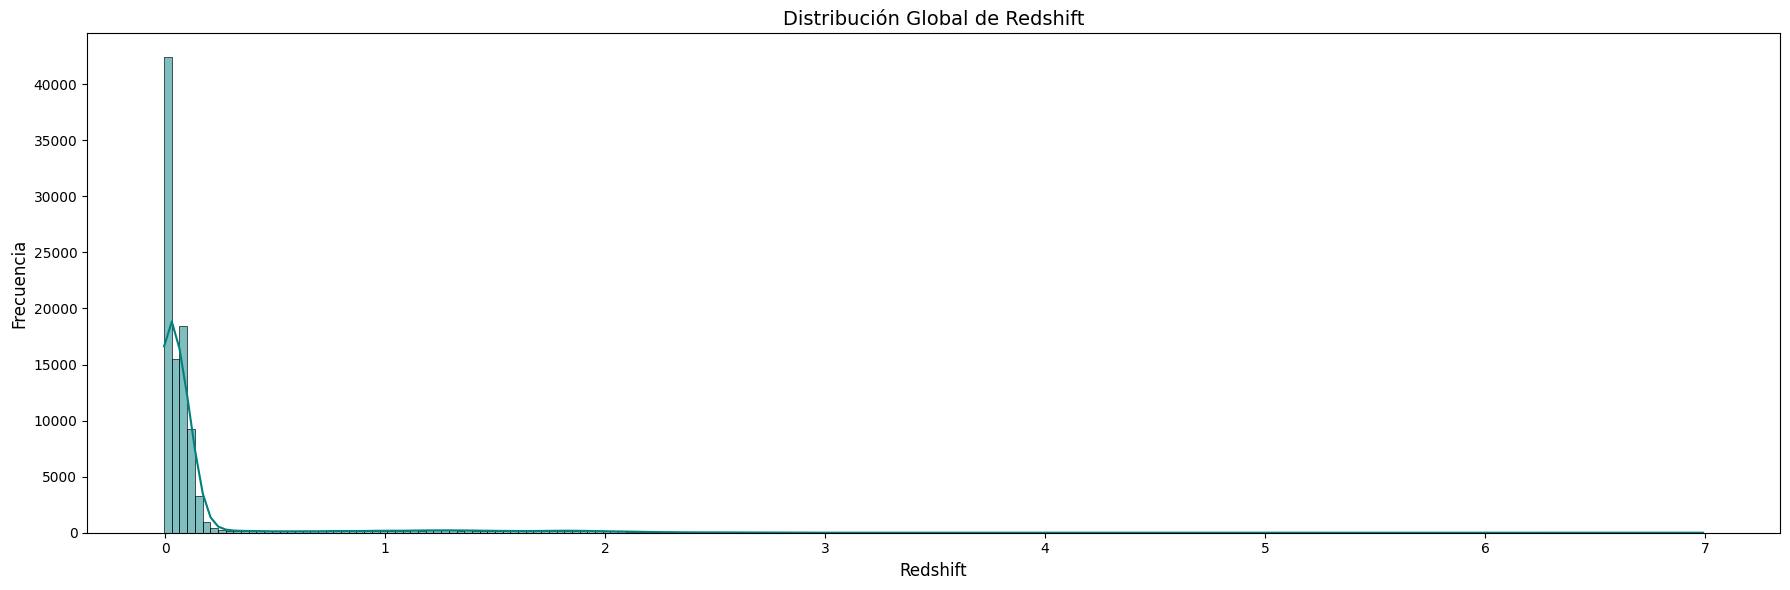

In [27]:
# Creamos una figura con dos subgráficos
fig, ax1 = plt.subplots(1, figsize=(18, 6))

# 1. Histograma Global con KDE
sns.histplot(data=df_lim, x="redshift", bins=200, kde=True, color="teal", ax=ax1)
ax1.set_title("Distribución Global de Redshift", fontsize=14)
ax1.set_xlabel("Redshift", fontsize=12)
ax1.set_ylabel("Frecuencia", fontsize=12)

plt.tight_layout()
plt.show()

Comprobamos cómo la amplísima mayoría de objetos se encuentran con valores entre 0 y ~0.25. Aún así, el gráfico llega a valores tan extremos como ~7, los cuásares se distribuyen hasta esas magnitudes.

C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\1877019495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y="redshift", data=df_lim, palette="viridis")


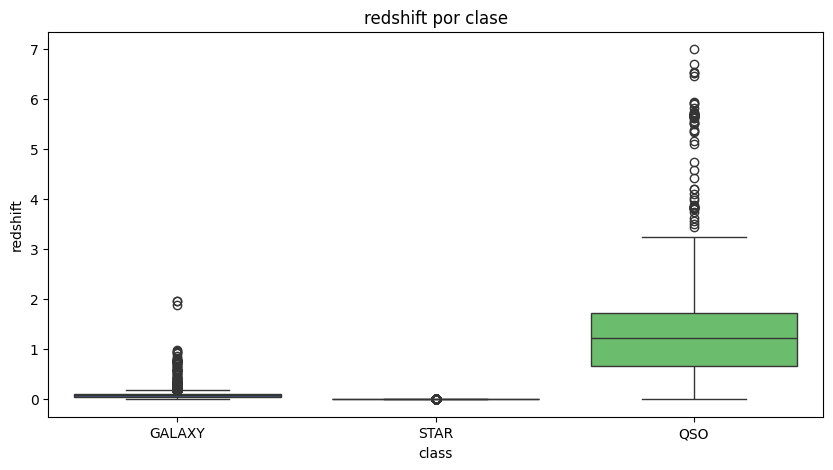

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="class", y="redshift", data=df_lim, palette="viridis")
plt.title("redshift por clase")
plt.show()

Por clase, se ve mucho mejor:
+ __estrellas__: al ser objetos con un lugar "fijo" en su galaxia, son estables a ojos de la Tierra. Son esféricas, por lo que su rotación y traslación no afectan a la forma geométrica apreciada desde los telescopios.
+ __galaxias__: afectadas por la expansión acelerada del universo y su propia rotación, acelerada por la materia y energía oscuras en sus colas. El polvo cósmico también distorsiona los datos, y afecta a un objeto en la medida de cómo de masivo sea (por lo que afecta menos a las estrellas). Su forma es achatada y se conforman como un disco, por lo que su movimiento deforma nuestra apreciación del objeto y afecta a redshift.
+ __cuásares__: ya comentado anteriormente

### __error fotométrico (ErrFot_u (psf-u))__: existe una diferencia de ~0.13 puntos

la media es más alta porque existe una población de objetos, probablemente galaxias muy difusas o cuásares muy débiles, donde el modelo falla. La media se distorsiona a la derecha porque muchos objetos presentan valores de radiación UV muy altos.

## bloque fotométrico
### __u y g (luz ultravioleta y filtro verde)__: menor magnitud= más brillo

Tanto en u como en g, las desviaciones con positivas en mediana-media. que la mediana > media nos indica que existen muchos valores muy pequeños que distorsionan la media.

Estos valores tan pequeños son objetos muy brillantes en ambos filtros. Puede deberse a que, efectivamente, existen muchos objetos extremadamente brillantes o a que el telescopio detecta con mayor facilidad estos objetos en detrimento de otros menos brillantes. Vamos a ver qué objetos son agrupando por clase en el filtro u, la mediana, para eliminar distorsiones:

In [29]:
df_lim.groupby("class")["u"].median()

class
GALAXY    18.987260
QSO       19.119415
STAR      18.537380
Name: u, dtype: float64

+ galaxias: presentan valores medio-altos de luz ultravioleta. 
+ estrellas: son los valores más bajos del dataset. Esto nos quiere decir que son los objetos que más energía UV desprenden, y que probablemente se hayan detectado muchas estrellas jóvenes
+ cuásares: son objetos intrínsecamente más luminosos y energéticos que las estrellas, pero suelen encontrarse a muchísima distancia, por lo que la radiación se atenúa en su viaje a la tierra. Esto se puede explicar por el lugar de la tierra en el __grupo local__, que es nuestro "filamento" de galaxias. Estamos en la periferia de nuestro filamento, y los cuásares se suelen presentar en las partes centrales de los filamentos o en los nodos. al estar en un lugar tan específico la tierra, los nodos más cercanos están muy lejos y reflejan luz que se emitió hace mucho, cuando aún eran más jóvenes. además, han tenido que atravesar una porción considerable de vacío cósmico, donde la expansión del universo es más potente, y más se atenúan las ondas.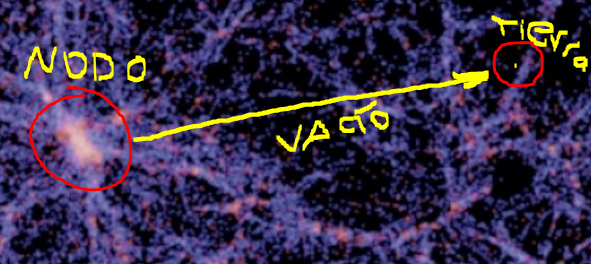

# <font color=red >III. __ANÁLISIS UNIVARIADO__

Para hacer el análisis univariado, vamos a escoger columnas que realmente puedan contarnos una historia sobre el universo que pueda explicarse a través de este análisis.
+ bloque estratégico: 
    + "redshift" 
    + "Firma UV (u-g)" 
    + "ÍndMadEst (g-r)" 
    + "SeparadorEstelar (psf-r)" 
    + "ÍndConcentracion (petroR50_r/petroRad_r)" 
    + "ErrFot_u (psf-u)"
+ Relación de ejes "expAB_r" - es lo circular (1) o elíptico (0) que es un objeto.
+ Tamaño aparente de los objetos estelares "petroRad_r" 
+ cronología de la observación "mjd"- observar las fechas en las que se fotografió.

## III.I: Bloque estratégico

Vamos a investigar: 
+ forma
+ Dispersión
+ Outliers

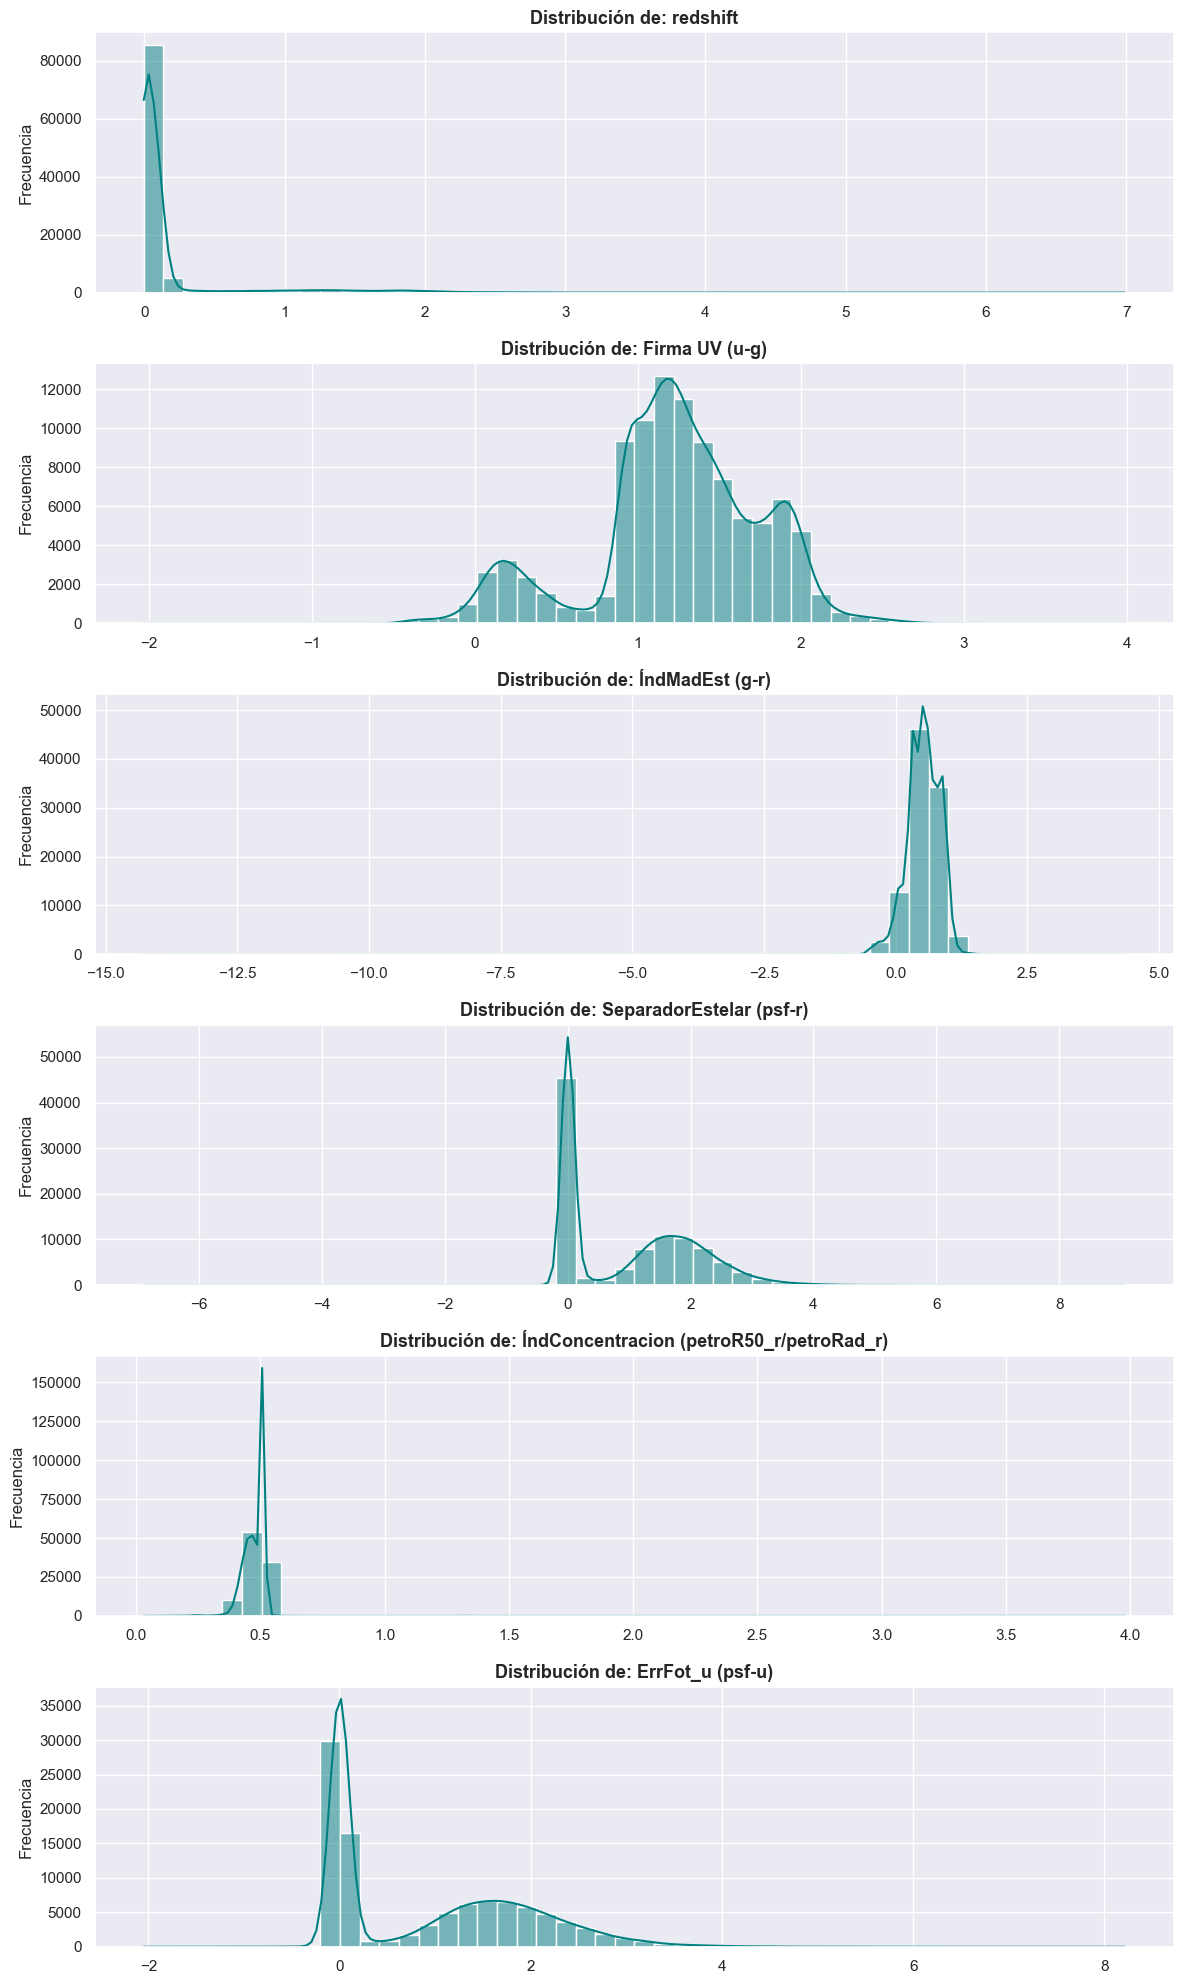

In [30]:
var_estr=[
    "redshift", 
    "Firma UV (u-g)", 
    "ÍndMadEst (g-r)", 
    "SeparadorEstelar (psf-r)", 
    "ÍndConcentracion (petroR50_r/petroRad_r)", 
    "ErrFot_u (psf-u)"
]

sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 20))

for i, col in enumerate(var_estr):
    plt.subplot(len(var_estr), 1, i+1)
    sns.histplot(df_lim[col], kde=True, color="teal", bins=50)
    plt.title(f"Distribución de: {col}", fontsize=13, fontweight='bold')
    plt.xlabel("")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

+ __FIRMA UV__: Observamos 3 picos diferenciados: 1 cercano a 0 (~0.25), otro cercano a 1 (~1.25) y otro cercano a 2 (~1.75).
Como ya hemos dicho antes, a menor valor, mayor radiación UV en comparación a la luz con filtro verde.
Lo primero que podemos sospechar es que los que se amontonan entorno al 0 son los cuásares --> lo veremos más adelante. 
entorno al 1 y 2 serían estrellas y galaxias, que son objetos más fríos.
Vemos también que la gráfica se extiende ~-2: objetos que emiten cantidades masivas de UV; y ~4, objetos que nos envían poco UV, ya sea por lejanía (expansión del universo), ruido o naturaleza misma del objeto.

+ __índice de madurez estelar__: Vemos que se trata de una distribución unimodal, apretada entorno a ~0.8. 
Los valores bajos son cuerpos azules: jóvenes y muy energéticos. Los rojos son objetos menos energéticos y más antiguos.
Observamos que, al verse en la gráfica hasta el -15, podrán existir outliers tremendamente jóvenes y energéticos, y probablemente cercanos, a los que no les haya afectado el viaje por el vacío cósmico.

+ __Separador estelar__: esta distribución es muy interesante. Vemos que es bimodal, con un pico muy alto, con curtosis alta(afilado) y concentrado entorno al 0; y luego una distribución normal más dispersa entorno a ~1.8/1.85.
Recordamos que esta métrica nos habla de la _forma_ de los objetos, siendo 0 más esférico y >1 más irregular.
El pico en 0 claramente nos habla de ESTRELLAS (esferas perfectas), y la distribución normal que apreciamos más adelante corresponderá a cuerpos más irregulares (galaxias, agujeros negros, estrellas de neutrrones, nubes de polvo, etc.). 
Luego haremos un groupby por aquí para comprobarlo.

+ __índice de concentración__: Mide cómo de "apretada" está la luz que detectamos de los objetos
    + Cercano a 0.5: Es el perfil de un punto (Estrellas y Quásares). Toda la luz está concentrada en el centro.
    + Menor a 0.45: Es el perfil típico de galaxias extendidas, donde la luz se desvanece suavemente hacia los bordes. Puede pasar también que sea luz distorsionada por polvo o ruido de estrellas o objetos con luz concentrada pero muy lejanos.
Más tarde también agruparemos para comprobar esto.


## III.II: __Bloque resto__

+ Relación de ejes "expAB_r" - es lo circular (1) o elíptico (0) que es un objeto.
+ Tamaño aparente de los objetos estelares "petroRad_r" 
+ cronología de la observación "mjd"- observar las fechas en las que se fotografió.

Vamos primero a agruparlas para visualizar distribución y dispersión:

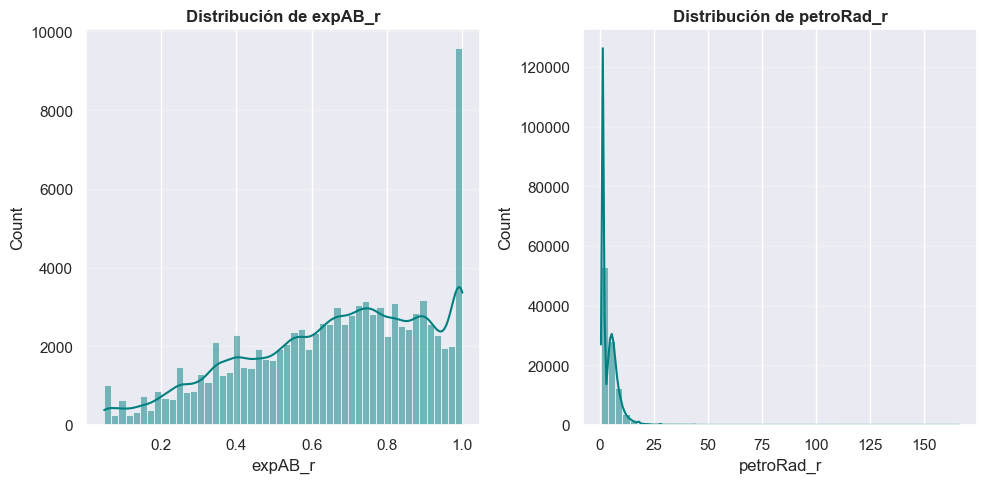

In [31]:
vars_adicionales = ["expAB_r", "petroRad_r"]

plt.figure(figsize=(15, 5))

for i, col in enumerate(vars_adicionales):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_lim[col], kde=True, color="teal", bins=50)
    plt.title(f"Distribución de {col}", fontweight='bold')
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

+ __expAB_r -forma__: como hemos señalado antes, 0 es un objeto muy elíptico y 1 un objeto perfectamente circular.
Observamos una distribución creciente de o a ~0.8, en la que la frecuencia de observación de objetos más circulares es creciente. Entre ~0.8 y ~0.99 vemos una tendencia decreciente: no se observan muchos objetos "casi" circulares, hay un escalón hasta 1 (objetos perfectamente circulares). En este escalón puede existir mucha influencia de distorsiones y ruido.

Más tarde lo observaremos en un boxplot agrupando por clases, pero por naturaleza misma, ese altísimo pico en 1 se debe a la presencia de cuásares y estrellas. 
Las galaxias son la clase más compleja de analizar, y pueden explicar por qué la distribución es así:
el plano galáctico respecto a nuestra posición es lo que definirá qué valor toma, de manera que si, por ejemplo, estamos viendo una galaxia desde arriba, se verá como un círculo y tomará valores cercanos a 1. si la vemos de lado, será como un cigarrillo, y tomará valores próximos a 0, y el resto de posibilidades es lo que observamos entre 0 y 1.

vamos a agruparlas por clases para observar este fenómeno:

elipticidad por clase


mean    median       std
class                               
GALAXY  0.640352  0.661428  0.201810
QSO     0.689525  0.749974  0.278888
STAR    0.682374  0.744130  0.279436

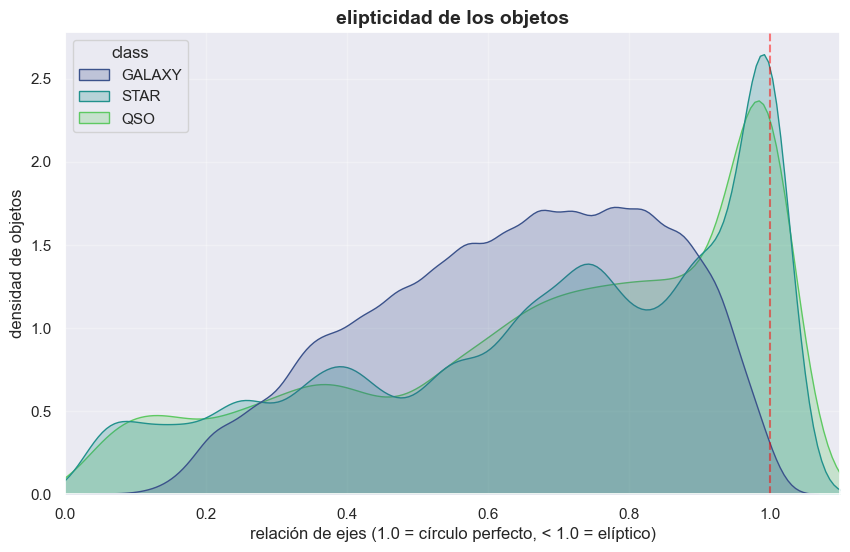

In [32]:
resumen_expab = df_lim.groupby("class")["expAB_r"].agg(['mean', 'median', 'std'])
print("elipticidad por clase")
display(resumen_expab)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_lim, x="expAB_r", hue="class", fill=True, palette="viridis", common_norm=False)

plt.title("elipticidad de los objetos", fontsize=14, fontweight='bold')
plt.xlabel("relación de ejes (1.0 = círculo perfecto, < 1.0 = elíptico)")
plt.ylabel("densidad de objetos")
plt.axvline(1.0, color='red', linestyle='--', alpha=0.5)
plt.xlim(0, 1.1)    #  Limitamos el eje x al rango físico real
plt.grid(alpha=0.3)
plt.show()

Aquí observamos varias cosas muy interesantes:
+ tal como habíamos dicho, se deberían distribuir entre 0 y 1 al existir un rango infinito de posiciones respecto a un plano galáctico. Vemos que no es así, ya que existen pocas o ninguna observación desde 0 hasta ~0.1. 
+ observamos una distribución mucho más grande de la que pensábamos en cuásares y estrellas en valores intermedios.

    estos dos fenómenos pueden tener una explicación que los relacione y explique:
    + __superposición de objetos__: puede pasar que si dos objetos, aunque sean lejanos y no tengan relación entre sí, aparecen muy juntos ante el sensor del telescopio, sean detectados como un sólo objeto muy elíptico.Si se clasifica como estrella o cuásar, que no sería raro por ser luz proveniente de estrellas o cuásares; tomará valores bajos.
    + __error de tracking__: los satélites siguen el movimiento de la tierra y están programados para no cometer errores que conlleven un desplazamiento que haga que un punto parezca una línea ante el sensor. En condiciones normales no suele pasar, pero si existe algún temblor no programado, este fenómeno aparece. desde un terremoto muy leve hasta un portazo dado en un mal momento, existen situaciones que pueden favorecer la aparición de esta anomalía.
    + __error de clasificación__: puede que el sistema falle en este punto. Si el sistema observa un objeto con valores cercanos a 0 y lo clasifica como estrella o cuásar, puede estar fallando el algoritmo de clasificación.
    + __distorsion y ruido cósmico__: ondas distorsionadas que hacen que objetos puntuales se expandan ante nuestra lente.



dejando de lado esta variable, vamos a explorar __PetroRad_r__

mide la forma del haz de luz que emite un objeto.

+ 0 será un objeto que emite luz muy concentrada, y observaremos muchos cuásares y estrellas en valores cercanos a él.
+ conforme avanzamos, los valores más grandes corresponderán sobre todo a galaxias, que son objetos muy extendidos.
observamos que la gráfica presenta valores extremadamente altos, existe una gran _asimetría positiva_. esta presencia de outliers y valores extremos pueden ser galaxias muy extendidas y masivas, errores parecidos a los enunciados justo arriba, o galaxias muy cercanas, que llegan mucho más grandes a la lente del telescopio.

vamos a agrupar por clase para estudiar esta distribución:

In [33]:
resumen_petrorad = df_lim.groupby("class")["petroRad_r"].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

display(resumen_petrorad)

count      mean    median       std       min        max
class                                                           
GALAXY  52207  7.100127  6.139966  4.476267  0.586635  166.52470
QSO     10414  1.743889  1.394466  1.668409  0.740047   72.75597
STAR    37192  1.429708  1.325915  1.574297  0.503416  118.94040

+ galaxias: vemmos como, efectivamente, presentan valores de media más altos por la gran diversidad de ángulos con los que llega la luz a la Tierra. media>mediana --> sesgo a la derecha --> outliers con valores desorbitados (el máximo es ~166) debido a su masividad, irregularidad o existencia de polvo cósmico, grandes vacíos que distorsionan las ondas o lejanía extrema.
+ cuásares muestran valores medianamente acordes a su naturaleza.
+ estrellas también, aunque llama poderosamente la atención quye exista un caso tan extremo como 118. casi con total seguridad se tratará de un error técnico o una mala clasificación.

en definitiva, petrorad nos va a ser muy útil para __separar galaxias de no-galaxias__. Vamos a visualizarlo en un boxplot:

C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\1212494357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_lim, x="class", y="petroRad_r", palette="viridis",


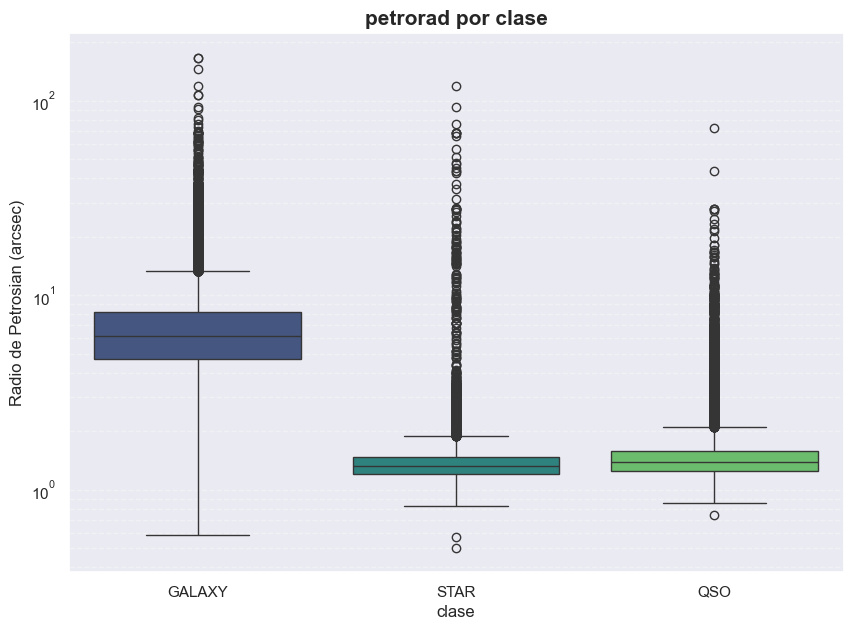

In [34]:
plt.figure(figsize=(10, 7))

sns.boxplot(data=df_lim, x="class", y="petroRad_r", palette="viridis", 
            order=["GALAXY", "STAR", "QSO"]) # Ordenamos para facilitar la lectura

plt.yscale("log")
plt.title("petrorad por clase", fontsize=15, fontweight='bold')
plt.xlabel("clase", fontsize=12)
plt.ylabel("Radio de Petrosian (arcsec)", fontsize=12)
plt.grid(axis='y', alpha=0.3, which="both", linestyle='--')

plt.show()

A modo de análisis temporal del proyecto SDSS, vamos a observar con qué frecuencia se efectuaron las observaciones en el proyecto Sloan

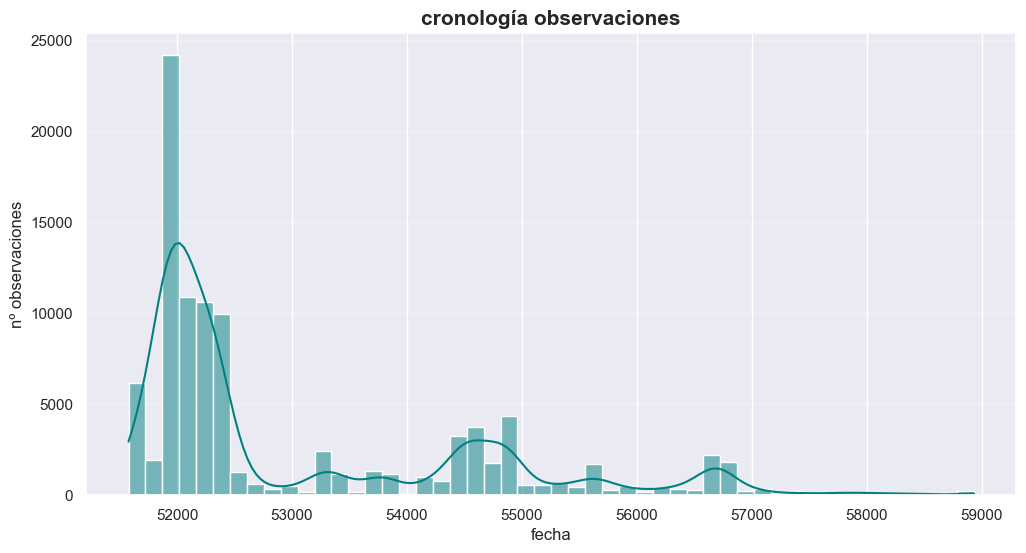

Rango de días MJD: 7354.00


In [35]:
plt.figure(figsize=(12, 6))

sns.histplot(df_lim['mjd'], bins=50, kde=True, color='teal')

plt.title("cronología observaciones", fontsize=15, fontweight='bold')
plt.xlabel("fecha", fontsize=12)
plt.ylabel("nº observaciones", fontsize=12)

plt.grid(axis='y', alpha=0.3)

plt.show()

print(f"Rango de días MJD: {df_lim['mjd'].max() - df_lim['mjd'].min():.2f}")

Cabe destacar que en el eje x vemos esos números "extraños" en vez de fechas concretas porque en astronomía no se usa el calendario gregoriano, sino el __modified julian date (MJD)__, que no tiene en cuenta años ni meses por la irregularidad natural de los mismos. Este método de medir el tiempo sólo tiene en cuenta días naturales, transcurridos desde MJD 0, que fue el 17/11/1858 por alguna razón. Por consecuencia, el día 18/11/1858 fue MJD 1, y el 1/1/2000 fue el MJD 51544, que significa simple y llanamente que desde el 17/11/1858 hasta el 1/1/2000 han pasado 51544 días naturales.

Aún así, y teniendo en cuenta esto, vamos a crear una columna de fechas en gregoriano para visualizar mejor la distribución de la toma de observaciones. En pandas se puede hacer directamente indicando la unidad que queremos (d) y la fecha de origen (1858-11-17)

C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\1577020515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim["fecha_observacion"] = pd.to_datetime(df_lim["mjd"], unit="D", origin="1858-11-17")


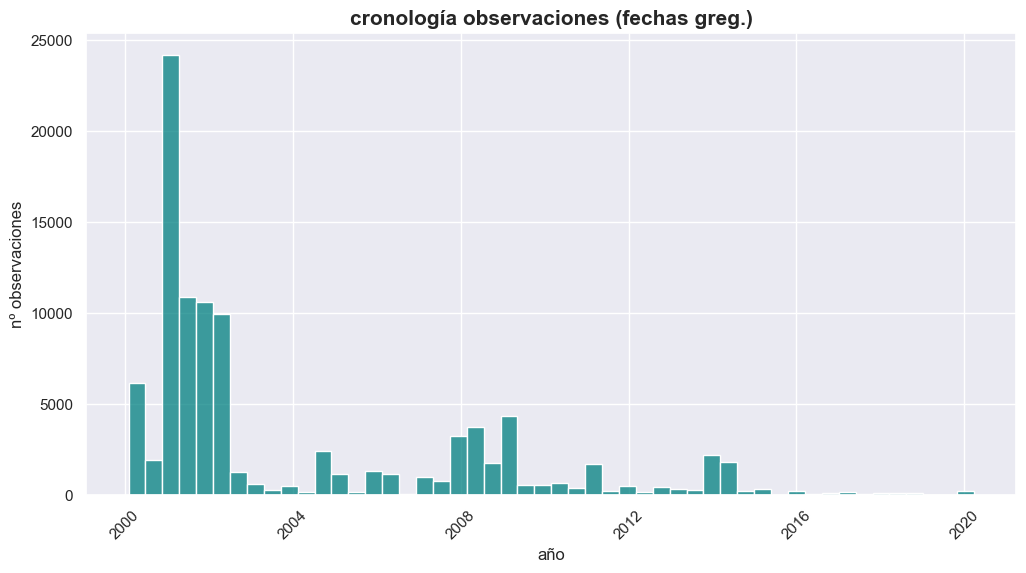

In [36]:
df_lim["fecha_observacion"] = pd.to_datetime(df_lim["mjd"], unit="D", origin="1858-11-17")

plt.figure(figsize=(12, 6))
sns.histplot(df_lim["fecha_observacion"], bins=50, color="teal", kde=False)

plt.xticks(rotation=45)
plt.title("cronología observaciones (fechas greg.)", fontsize=15, fontweight="bold")
plt.xlabel("año", fontsize=12)
plt.ylabel("nº observaciones", fontsize=12)

plt.show()

Podemos observar cómo el proyecto comenzó a inicios de los 2000, entre 2000 y 2003 es donde se concentra la gran mayoría de observaciones. A partir de ahí, baja mucho la densidad de observaciones, y cada ciclo da lugar a nuevos releases del proyecto.

Para visualizarlo numéricamente, vamos a hacer bins de 3 años y a observar las frecuencias.

In [37]:
df_lim["año"] = df_lim["fecha_observacion"].dt.year

#   creamos los bloques de 3 años desde el 2000
bins = list(range(2000, df_lim["año"].max() + 4, 3))
labels = [f"{bins[i]}-{bins[i]+2}" for i in range(len(bins)-1)]

#   categorizamos los años en estos bloques
df_lim["bloque_trienal"] = pd.cut(df_lim["año"], bins=bins, labels=labels, right=False)

tabla_frecuencias = df_lim.groupby(["bloque_trienal", "class"], observed=True).size().unstack(fill_value=0)
tabla_frecuencias["total_periodo"] = tabla_frecuencias.sum(axis=1)

print("tabla de frecuencias absolutas (conteo de objetos):")
display(tabla_frecuencias)


tabla de frecuencias absolutas (conteo de objetos):


C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\313000179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim["año"] = df_lim["fecha_observacion"].dt.year
C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\313000179.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim["bloque_trienal"] = pd.cut(df_lim["año"], bins=bins, labels=labels, right=False)


class           GALAXY   QSO   STAR  total_periodo
bloque_trienal                                    
2000-2002        49037  8028   8244          65309
2003-2005          775   127   4778           5680
2006-2008          949   219  12917          14085
2009-2011          815   703   5877           7395
2012-2014          584   890   4209           5683
2015-2017           24   260    823           1107
2018-2020           23   187    344            554

Aquí vemos definitivamente qué número de observaciones se atribuye a cada período de 3 años. Vamos a calcularlo en % sobre el total de observaciones:

In [38]:
#   calculamos la frecuencia absoluta y el porcentaje total
#   usamos sort=false para que respete el orden cronológico de los bloques
conteo_absoluto = df_lim["bloque_trienal"].value_counts(sort=False)
conteo_relativo = df_lim["bloque_trienal"].value_counts(normalize=True, sort=False) * 100

#   unimos ambos resultados en una tabla resumen
tabla_resumen_periodos = pd.DataFrame({
    "cantidad_objetos": conteo_absoluto,
    "porcentaje_del_total": conteo_relativo
})

print("peso de cada trienio sobre el total de observaciones:")
display(tabla_resumen_periodos.round(2))

peso de cada trienio sobre el total de observaciones:


cantidad_objetos  porcentaje_del_total
bloque_trienal                                        
2000-2002                  65309                 65.43
2003-2005                   5680                  5.69
2006-2008                  14085                 14.11
2009-2011                   7395                  7.41
2012-2014                   5683                  5.69
2015-2017                   1107                  1.11
2018-2020                    554                  0.56

para hacerlo más visual, vamos a hacer un gráfico circular con el % s/el total de cada período

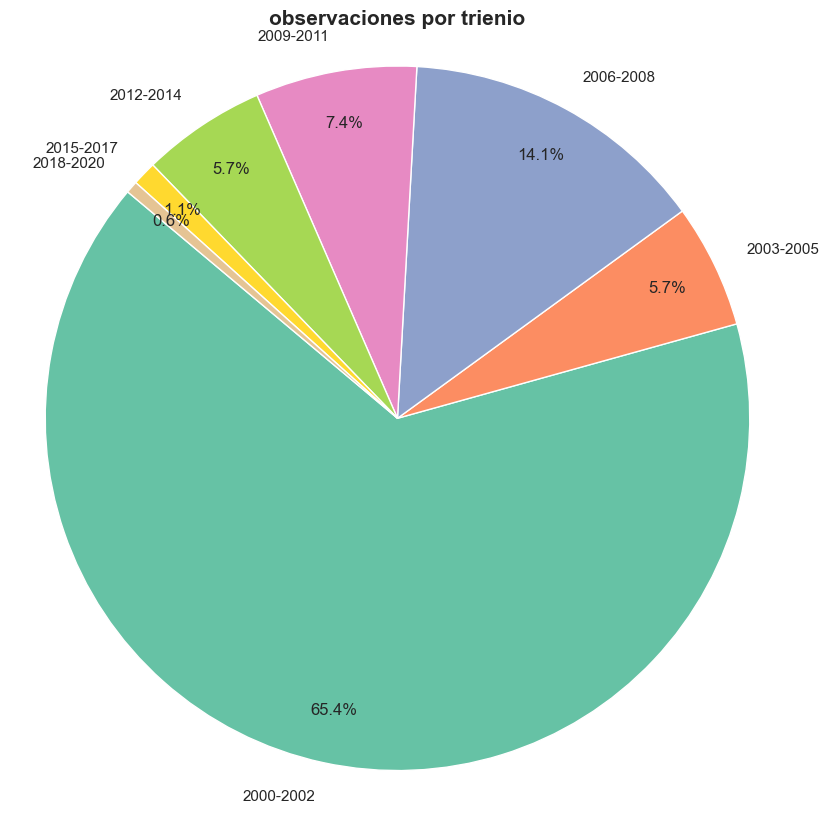

In [39]:
plt.figure(figsize=(10, 10))

plt.pie(tabla_resumen_periodos["cantidad_objetos"], 
        labels=tabla_resumen_periodos.index, 
        autopct="%1.1f%%", 
        startangle=140, 
        colors=sns.color_palette("Set2", len(tabla_resumen_periodos)),
        pctdistance=0.85
)

plt.title("observaciones por trienio", fontsize=15, fontweight="bold")

# aseguramos que el gráfico sea un círculo perfecto
plt.axis("equal") 
plt.show()

Observamos que la inmensa mayoría de observaciones (~80%) se atribuyen a 2 periodos: 2000-2002 y 2006-2008. El ~20% restante se atribuye a los otros 6 trienios. Vemos que hay una tendencia agresiva a la baja en el nº de observaciones desde 2012. Vamos a calcular qué % del total de obs. se han calculado en los últimos 3 trienios:

In [40]:
(tabla_resumen_periodos["porcentaje_del_total"][4]+tabla_resumen_periodos["porcentaje_del_total"][5]+tabla_resumen_periodos["porcentaje_del_total"][6])

C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\414479641.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (tabla_resumen_periodos["porcentaje_del_total"][4]+tabla_resumen_periodos["porcentaje_del_total"][5]+tabla_resumen_periodos["porcentaje_del_total"][6])


np.float64(7.357759009347481)

En 9 años se han efectuado el 7.35% del total de observaciones. Sólo en el trienio precedente (2009-2011) se efectuaron más que en los 9 años siguientes.

Como se trata de datos tan "extraños" en su distribución, he investigado cómo se estructuró a nivel temporal Sloan Digital Sky Survey:
+ inicialmente, se tomaron millones de fotos para tener un mapeado del cielo masivo, se centraron en obtener un volumen de objetos grandísimo. 
+ en años posteriores, el proyecto gira a estudio de espectroscopía, y analiza en detelle cada objeto. No se centra en volumen sino en calidad de la observación, estudiando más el detalle de objetos extremos y centrandose menos en la detección masiva de nuevos objetos. Commo existe el consenso a nivel científico de que __el universo es homogéneo__ (muy similar en cuanto a composición y estructura en todas partes) __e isótropo__ (se ve prácticamente igual en todas partes), con muestras de decenas o cientos de millones de objetos, es muy difícil que detectando otras decenas de millones vayamos a sacar conclusiones muy diferentes de a las que ya hemos llegado con la muestra actual. Se da por hecho que no hay lugares "preferidos" para el universo en el que haya propiedades significativamente diferentes a otras regiones, siempre hablando a gran escala, por supuesto.

Además de este factor, tenemos que tener en cuenta que estoy trabajando con un dataset de ~100,000 filas. SDSS ha producido millones de observaciones más. al trabajar con una rebanada del total, existe la posibilidad de que esta muestra que he cogido para trabajar esté centrada en datos iniciales del proyecto, sesgada hacia un momento temporal concreto por alguna razón.

# <font color=red >__IV. ANÁLISIS BIVARIANTE__

Antes de empezar con este bloque, cabe destacar qué enfoque le voy a dar. Tenemos un dataframe con ~50 variables de distinta naturaleza, asi que meter todo en el mismo saco y analizar en un heatmap de esas características puede generar mucho ruido entre variables que no tienen nada que ver o podemos sacar conclusiones muy sesgadas por la causalidad.
Creo que esta parte del EDA tiene que guiarse por objetivos claros y por preguntas en concreto que tenga sentido hacer en el contexto de un EDA de naturaleza no-técnica.

## IV.I. __Mapas de calor__

Para orientar qué variables vamos a querer estudiar en los mapas de calor, partimos de que existen grupos de variables dentro de nuestro dataset en los que __no tiene sentido estudiar correlaciones entre ellos__.

Por ejemplo, estudiar la correlación entre una variable fecha y la forma del objeto no tiene sentido. Aún en el caso de que en años concretos se hayan detectado más, por ejemplo, estrellas que cuásares; estduairlo no aporta una información valiosa ni significativa en relación al objetivo final del dataset: el estudio del universo y sus componentes.

así, vamos a concretar __grupos__
    
+ __A)  grupo físico__:  `redshift, u-g, g-r, r-i, i-z, expAB_r, petroRad_r` 
    + son variables de distancia, color y morfología. Veremos si, por ejemplo, la distancia al objeto y el color con el que captamos el mismo tienen algún tipo de relación.

+ __B)  calidad__: `redshift` con las variables de error `ErrFot_u, ErrFot_g, ErrFot_r, ErrFot_i, ErrFot_z`
    + el redshift (que nos habla de distancia) y los errores fotométricos, en principio pueden estar correlacionados.

+ __C)  sesgos__: `redshift` (distancia) con posición (`ra, dec`) y momento de medición (`mjd`)
    + previamente he comentado que existe un consenso en el campo de la física de que el universo es homogéneo e isótropo. Con esta agrupación podremos observar si existen altas concentraciones de redshift en ciertas zonas del espacio, lo que sería señal de un sesgo en el estudio. Con mjd podemos ver si en algún período del estudio se ha priorizado redshifts altos o bajos o posiciones concretas.

+ __D)  magnitudes y colores__: `u, g, r, i, z` vs `u-g, g-r, r-i, i-z`
    + vamos a ver si ha tenido sentido construir las variables del segundo bloque, es decir, que si los filtros que hemos creado realmente aportan información nueva al EDA o son redundantes.
    + Recordamos que 'Firma UV (u-g)', 'ÍndMadEst (g-r)', 'GradEnr (r-i)',
       'SondaInfrProf (i-z)' son variables que creamos en la primera parte del EDA. 

+ __Firma ultravioleta__ (u-g): filtro esencial para encontrar cuásares, ya que emiten una cantidad enorme de energía UV.
+ __Índice de madurez estelar__(g-r): muy útil para medir la edad de las galaxias. Un valor bajo (azul) nos indica galaxias con formación estelar activa (bebés de galaxias), mientras que un valor alto (rojo) nos revela galaxias elípticas masivas y antiguas.
+ __Gradiente de enrojecimiento__(r-i): para medir distancias o interferencia de polvo.
No es exactamente como el redshift pese a estar muy relacionados, puesto que esto es un _color_ y nuestra columna redshift mide _velocidad y distancia_
+ __Sonda de infrarrojo profundo__(i-z): cuando un objeto está masivamente lejos (redshift muy alto), su luz visible desaparece y solo se puede ver en el espectro infrarrojo. Si un objeto tiene un valor muy alto en este índice pero casi no se ve en u o g, hemos encontrado un objeto del universo temprano.

In [41]:
df_lim.columns

Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run',
       'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid', 'petroRad_u',
       'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z',
       'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u',
       'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift',
       'Firma UV (u-g)', 'ÍndMadEst (g-r)', 'GradEnr (r-i)',
       'SondaInfrProf (i-z)', 'SeparadorEstelar (psf-r)',
       'ÍndConcentracion (petroR50_r/petroRad_r)', 'ErrFot_u (psf-u)', 'class',
       'fecha_observacion', 'año', 'bloque_trienal'],
      dtype='object')

### __A) VARIABLES FÍSICAS__

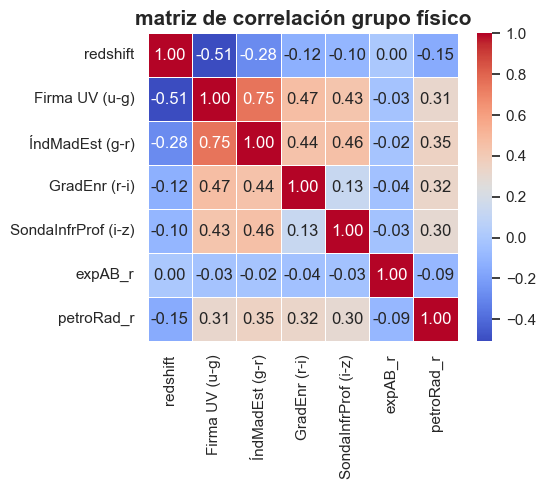

In [42]:
variables_fisicas = ["redshift", "Firma UV (u-g)", "ÍndMadEst (g-r)", "GradEnr (r-i)", "SondaInfrProf (i-z)", "expAB_r", "petroRad_r"]

matriz_fisica = df_lim[variables_fisicas].corr()

plt.figure(figsize=(5,4))
sns.heatmap(matriz_fisica, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("matriz de correlación grupo físico", fontsize=15, fontweight="bold")
plt.show()

Aquí vamos a ir por partes porque hay varios insights importantes:
+ __redshift__
    + vs `Firma UV (u-g)` : Vemos una correlación negativa fuerte. A nivel físico significa que a mayor redshift (mayor distancia al objeto), el valor de la firma UV disminuye (corrimiento al azul). Explica por qué los objetos más lejanos se ven más azules en el filtro UV, principio aplicado extendidamente en las investigaciones de astronomía.
    Aún así, no es exactamente así (a más lejano, más azul):

    El fenómeno físico se sigue llamando Redshift (corrimiento al rojo), pero lo que vemos es un "exceso de UV" en objetos lejanos. No es que el espacio vuelva azul la luz, sino que __los objetos que logramos ver a distancias tan brutales (los cuásares) son intrínsecamente tan calientes y azules que su firma UV domina la estadística, incluso después de haber sido estirada su longitud de onda por el redshift__

    __`Es decir, no es que el redshift los vuelva azules, sino que a mayor redshift (mayor distancia al objeto), solo los objetos más energéticos y azules (cuásares) sobreviven para ser detectados`__, ya que los objetos menos energéticos a esas distancias emiten ondas más rojas, que tras el efecto del redshift (estiramiento de la longitud de onda), simplemente desaparecen del espectro ultravioleta. Esto en astronomía se llama efecto de selección, y no deja de ser un __sesgo de detección__ a nivel de ciencia de datos (uno inevitable, por otro lado).

    + vs `expAB_R` (morfología del objeto): es muy significativo que sea un 0 exacto. Nos da una información muy directa: que la forma de un objeto es absolutamente independiente del redshift que nos llega del mismo (forma != distancia y color).
+ __petroRad_r__: recordamos que mide "cuánto ocupa" un objeto en el cielo, no su forma o tamaño intrínseco, sino cuánto se exapande ante nuestros ojos
    + vs `filtros de color` "Firma UV (u-g)", "ÍndMadEst (g-r)", "GradEnr (r-i)", "SondaInfrProf (i-z)":
    Vemos valores muy similares (~0.3). Cuanto mayor sea el radio de Petrosian (más tamaño aparente), estos objetos se verán más rojos. Los objetos más extendidos del universo son las galaxias, que se ven muy rojas en los filtros de color. Por otro lado, los cuásares y estrellas son casi puntos a nuestros ojos, y tienden más al azul. 
    para que quede claro, si 0.3 nos dice que a mayor expansión, más rojo. si el valor fuera -0.3, significaría que a más expandido, más azul ante nuestrops filtros.
+ __entre filtros de color__: Observamos `correlaciones altas` porque se componen de diferencias entre bandas de luz, y muchas veces una misma banda de luz está presente en varios filtros (r,por ejemplo, está presente en 3 filtros)
+ __expAB_R (morfología)__: presenta `independencia con todos los demás` (valores <0.1 para el resto de variables).
    Es una buena noticia, porque nos revela de que esta variable aporta una dimensión de información de la que ninguna otra variable nos habla. A nivel físico, entonces:
    + la  forma de un objeto es independiente del color que percibimos. Tiene sentido. Por ejemplo, una galaxia roja(vieja) puede ser tan elíptica o circular como una jóven (azul), hecho que tiene todo el sentido del mundo. También es independiente de la morfología del objeto la luz que detectamos de el mismo, o el valor de redshift que detectemos(como ya hemos señalado en el primer punto)
    

Para estudiar más detalladamente la relación __redshift vs firma UV__, que tan significativa es, vamos a visualizarla por clases en un gráfico de dispersión. Esperamos ver una nube de puntos de cuásares que se extienda para mayores valores de redshift (a mayores distancias recorridas por las ondas emitidas).

Veámoslo:

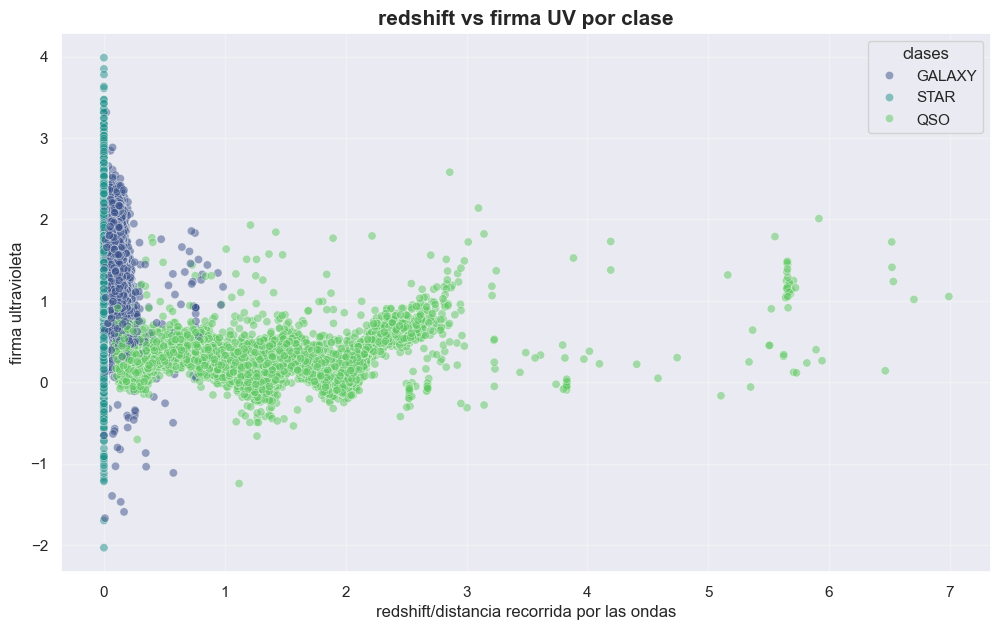

In [43]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_lim, x="redshift", y="Firma UV (u-g)", hue="class", alpha=0.5, palette="viridis")

plt.title("redshift vs firma UV por clase", fontsize=15, fontweight="bold")
plt.xlabel("redshift/distancia recorrida por las ondas", fontsize=12)
plt.ylabel("firma ultravioleta", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title="clases")

plt.show()

Esta gráfica es absolutamente reveladora. 

Las estrellas presentan valores de redshift ~0, porque están muy cerca de nosotros. El redshift es un efecto físico que actúa a escalas masivas de distancia, por la misma naturaleza del efecto, que no deja de ser el estiramiento de las longitudes de onda por la expansión acelerada del espacio. Si vemos a todas acumuladas en redshift 0 significa que __no somos capaces de detectar estrellas más lejos de manera individual__. Hay, evidentemente, estrellas distribuidas por todo el universo de manera homogénea a gran escala, pero no podemos detectarlas porque no son los suficientemente energéticas y la luz UV que emiten "muere" antes de llegar a la Tierra por redshift. Para detectarlas, se recurre a otros métodos como lentes gravitacionales, o se recurre a otros espectros de luz no-visible como la infrarroja o los rayos X. 

En cuanto a las distancias "medias", somos capaces de detectar sólo galaxias y cuásares en el espectro ultravioleta. Vemos que en esos niveles, existe cierta convivencia entre cuásares y galaxias. Para distinguir si el objeto con ese redshift, vamos a decir, de entre ~0 y ~1, el desempate para distinguir si son galaxias o cuásares se hace por la naturaleza de las mismas: las galaxias son objetos extendidos y los cuásares puntos increíblemente densos y energéticos en mitad de galaxias, por lo que por propia morfología deberíamos ser capaces de distinguirlos (entre otros métodos y herramientas de los que disponemos).

A partir de redshift ~1, sólo detectamos cuásares. Al ser los objetos más energéticos del universo, son los únicos que podemos detectar en el espectro UV a tales distancias, porque como las ondas que emiten tienen una longitud de onda tan apretada, pese a sufrir el efecto del redshift y expandirse en el camino, terminan llegando aún vivas a la Tierra. Por eso vemos que se mueven en valores aproximados de entre 0.5 y 1.5; no porque no sean más energéticas (que lo son), sino porque parte de su energía se diluye en el camino.

Vemos que en estrellas los valores UV tienen una gama de UVs muy variada. Algunas llegan con UVs altísimos porque son altamente energéticas, pero al ser cercanas, nos llega casi tal cual a la Tierra. Las galaxias toman valores también variadas, aunque más concentradas en UVs medios-bajos (rojos), también son afectadas por la distancia.

Pero, a mi entender, lo más revelador de esta gráfica es que __desde la Tierra, sólo somos capaces de detectar estrellas individuales de nuestra galaxia y alguna cercana en UV__. Este hecho implica que desde aquí, existe un radio máximo de detección de estrellas que define una esfera máxima de detección de estrellas en ultravioleta. Ese radio es, básicamente, la `Vía Lactea`. Más allá, no podemos detectar estrellas individuales por UV. 
Existe otra esfera máxima de detección de galaxias por UV. Su dominio es de aproximadamente 8000 años luz, es decir, los `filamentos de nuestra red cósmica`. El dominio de la esfera máxima de detección de cuásares por UV llega casi al `borde del universo observable` (>13,000 años luz). Más allá de allí, no podemos ver en ningún espectro de luz visible, porque la luz que nos llega a partir de ahí es la luz cosmica de fondo,la primera luz que se emitió en la historia del universo, tras la recombinación, unos 380,000 años tras el big bang. Es decir, los objetos que se encuentran allí están tan masivamente lejos que la luz emitida en aquel momento ha tardado ~13,800 MILLONES DE AÑOS en llegar hasta aquí por la expansión del universo.
Esa luz se conoce comunmente como CMB (Radiación cósmica de fondo), y es una vista al pasado, al universo más jóven que jamás podremos ver.

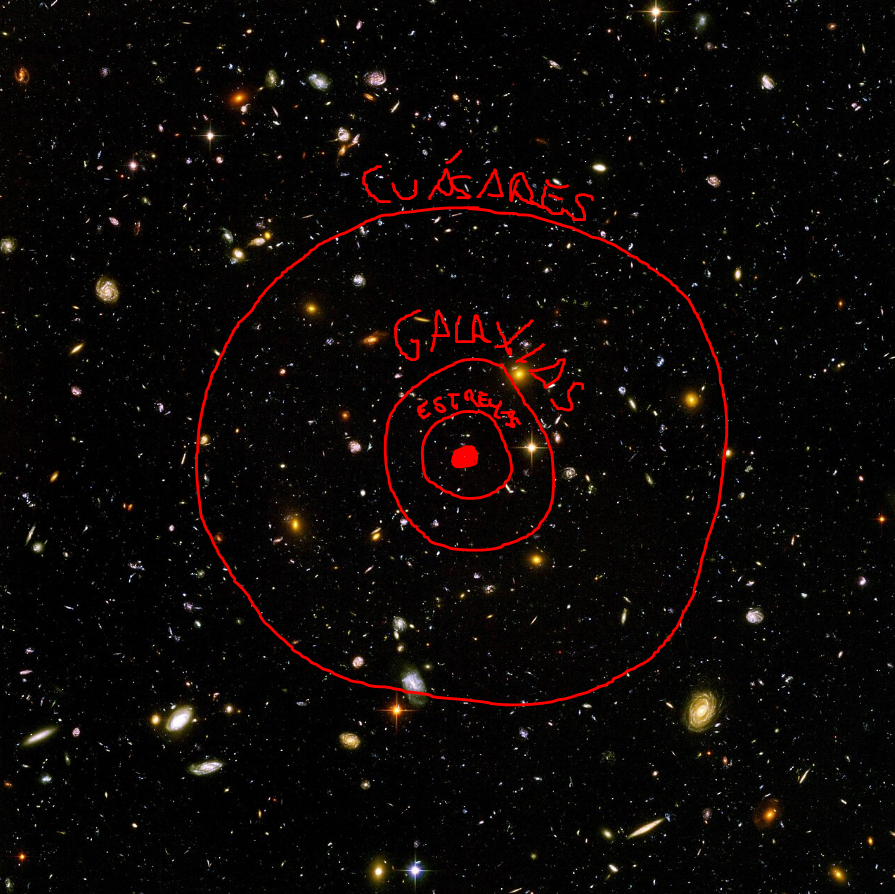

### __B) VARIABLES DE CALIDAD__ 
__`ErrFot_u, ErrFot_g, ErrFot_r, ErrFot_i, ErrFot_z` vs `redshift`__

Estas variables nos hablan de los errores que presentan las bandas de color en la lente del telescopio. Las vamos a enfrentar con redshift. Es decir, queremos estudiar si la distancia al objeto está relacionada con los errores fotométricos.

In [44]:
df_lim.columns

Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run',
       'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid', 'petroRad_u',
       'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z',
       'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u',
       'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift',
       'Firma UV (u-g)', 'ÍndMadEst (g-r)', 'GradEnr (r-i)',
       'SondaInfrProf (i-z)', 'SeparadorEstelar (psf-r)',
       'ÍndConcentracion (petroR50_r/petroRad_r)', 'ErrFot_u (psf-u)', 'class',
       'fecha_observacion', 'año', 'bloque_trienal'],
      dtype='object')

Vemos que en su momento se me olvidó crear las columnas de error fotométrico de g, r, i, z. Las creamos:

In [45]:
df_lim["ErrFot_g"]=df_lim["psfMag_g"]-df_lim["g"]
df_lim["ErrFot_r"]=df_lim["psfMag_r"]-df_lim["r"]
df_lim["ErrFot_i"]=df_lim["psfMag_i"]-df_lim["i"]
df_lim["ErrFot_z"]=df_lim["psfMag_z"]-df_lim["z"]

C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\2273058800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim["ErrFot_g"]=df_lim["psfMag_g"]-df_lim["g"]
C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\2273058800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim["ErrFot_r"]=df_lim["psfMag_r"]-df_lim["r"]
C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\2273058800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

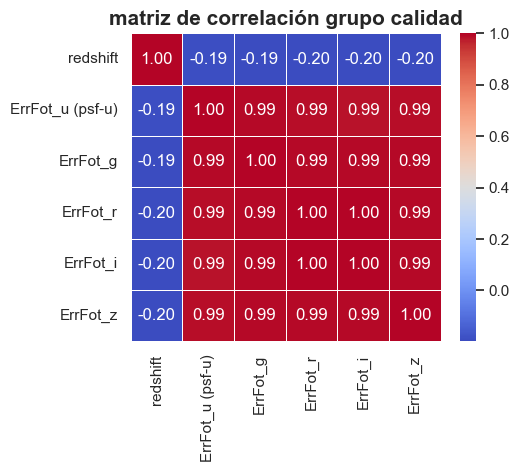

In [46]:
var_cal = ["redshift", "ErrFot_u (psf-u)", "ErrFot_g", "ErrFot_r", "ErrFot_i", "ErrFot_z"]

matriz_cal = df_lim[var_cal].corr()

plt.figure(figsize=(5,4))
sns.heatmap(matriz_cal, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("matriz de correlación grupo calidad", fontsize=15, fontweight="bold")
plt.show()

Salta a la vista que las variables que acabamos de crear no aportan ninguna información diferente, ya que presentan una colinealidad extrema entre ellas. En esencia, esta correlación positiva extrema nos dice que si existe un error en la banda de verde, existirá también en la roja y en el resto de bandas, asi que el error fotmétrico en el resto de bandas no me aportan información relevante.
Lo primero que haremos será eliminarlas. 

Dicho esto, dejaremos sólo la banda r (rojo), ya que a nivel físico es la que más ruido presenta y la más usada en los estudios.

Quedándonos sólo con ese dato (`correlación redshift-ErrFot_r`), tenemos una ligera __correlación negativa__.
Esto significa que a __mayor distancia al objeto, menor será el error fotométrico obtenido__.
Puede sonar contradictorio, pero si lo hilamos con el estudio del bloque físico que hemos hecho previamente, puede llegar a entenderse:

+ la métrica de error que estamos usando es ErrFot_r =PsfMag r- r. lo que mide es la discrepancia entre una forma puntual de medir un objeto (PsfMag) y la luz total que nos llega (r). La clave es que:
    + En galaxias cercanas, que son objetos muy extendidos, el modelo de detección puntual fallará mucho y el error aumentará para ellas.
    + En galaxias y cuásares lejanísimos, como la luz que nos llega es muy reducida por su lejanía, se detecta bien por el modelo de detección puntual (PsfMag), asi que el error total será menor

Por lo tanto, concluimos algo tan poco intuitivo como que __`a mayor redshift/distancia al objeto, menor error fotométrico`__.

Para visualizar cómo varía la variable de error fotométrico por clase de objeto, hacemos un gráfico de dispersión que compare redshift con error.

C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\3569159729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim["ErrFot_r"] = df_lim["psfMag_r"]- df_lim["r"]


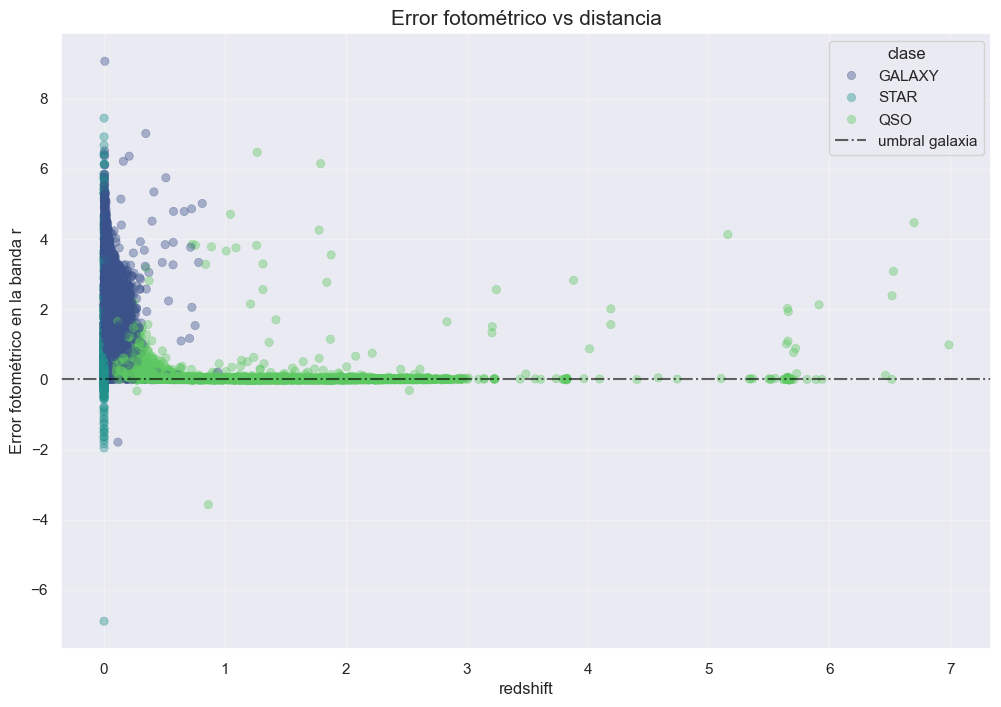

In [47]:
df_lim["ErrFot_r"] = df_lim["psfMag_r"]- df_lim["r"]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_lim, 
    x="redshift", 
    y="ErrFot_r", 
    hue="class", 
    alpha=0.4, 
    palette="viridis",
    edgecolor=None
)

plt.axhline(y=0, color="black", linestyle="-.", alpha=0.6, label="umbral galaxia")

plt.title("Error fotométrico vs distancia", fontsize=15)
plt.xlabel("redshift", fontsize=12)
plt.ylabel("Error fotométrico en la banda r", fontsize=12)
plt.legend(title="clase")
plt.grid(True, alpha=0.3)

plt.show()

Vemos como, en efecto, los objetos que presentan menos errores son los cuásares, pese a ser lejos en ocasiones. De hecho, los más cercanos presentan mayor error de media. Las galaxias presentan errores mucho más altos, y las estrellas están más distribuidas en errores altos y bajos (la mayoría están muy cerca, como hemos dicho antes).

Procedemos a borrar las columnas de error fot. no- rojo:

In [48]:
df_lim.columns

Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run',
       'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid', 'petroRad_u',
       'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z',
       'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u',
       'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift',
       'Firma UV (u-g)', 'ÍndMadEst (g-r)', 'GradEnr (r-i)',
       'SondaInfrProf (i-z)', 'SeparadorEstelar (psf-r)',
       'ÍndConcentracion (petroR50_r/petroRad_r)', 'ErrFot_u (psf-u)', 'class',
       'fecha_observacion', 'año', 'bloque_trienal', 'ErrFot_g', 'ErrFot_r',
       'ErrFot_i', 'ErrFot_z'],
      dtype='object')

In [49]:
col_eliminar = [ 'ErrFot_i','ErrFot_z','ErrFot_g',"ErrFot_u (psf-u)"]
df_lim = df_lim.drop(columns=col_eliminar)

df_lim.columns

Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run',
       'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid', 'petroRad_u',
       'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z',
       'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u',
       'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift',
       'Firma UV (u-g)', 'ÍndMadEst (g-r)', 'GradEnr (r-i)',
       'SondaInfrProf (i-z)', 'SeparadorEstelar (psf-r)',
       'ÍndConcentracion (petroR50_r/petroRad_r)', 'class',
       'fecha_observacion', 'año', 'bloque_trienal', 'ErrFot_r'],
      dtype='object')

### __C)  VARIABLES DE SESGO: `redshift` con posición (`ra, dec`) y momento de medición (`mjd`)__

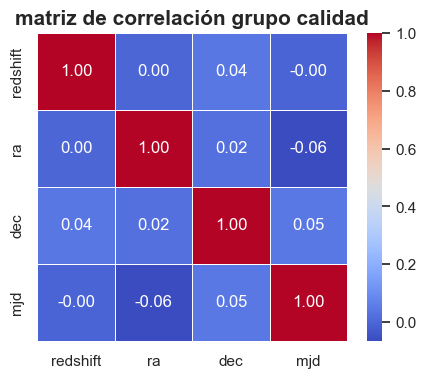

In [50]:
var_sesg = ["redshift", "ra", "dec","mjd"]

matriz_sesg = df_lim[var_sesg].corr()

plt.figure(figsize=(5,4))
sns.heatmap(matriz_sesg, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("matriz de correlación grupo calidad", fontsize=15, fontweight="bold")
plt.show()

Vemos el mismo resultado entre todas las variables: no están correlacionadas. Esto no hace más que confirmar y aclarar varios conceptos que anteriormente hemos introducido en el EDA:
+ __Universo isotrópico__: que las variables de posición (coordenadas) `ra`-`dec` y el `redshift` no estén correlacionadas significativamente apoya la idea de un universo isotrópico, es decir, que no privilegia a ninguna dirección en específico del mismo a gran escala. Se observa la misma profundidad en todas las direcciones.
+ __aleatoriedad en la toma de muestras__: al estar `mjd` y `redshift`, y a su vez `mjd` con `ra`-`dec` no correlacionados, confirmamos que las fotos que se tomaron fueron aleatorias en grandísima medida. No se privilegió ningún día de la semana para tomar fotos más lejanas (mjd-redshift), ni se concentró temporalmente la toma de fotos en una zona específica del universo (mjd-ra/dec).

## __D) COLORES y FORMAS__
+ Diagrama corr. color-color + scatter
+ Diagrama corr. petroRad -expAB + scatter por clases

### __diagrama color-color__

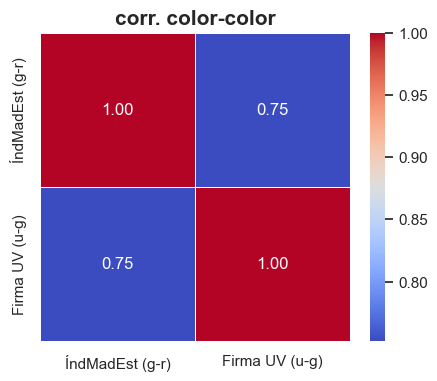

In [51]:
color_color = ["ÍndMadEst (g-r)","Firma UV (u-g)"]

matriz_color = df_lim[color_color].corr()

plt.figure(figsize=(5,4))
sns.heatmap(matriz_color, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("corr. color-color", fontsize=15, fontweight="bold")
plt.show()

Observamos que la variable de UV y índice de madurez estelar (que mide lo caliente/jóven o frío/viejo que es un objeto), están correlacionadas fuertemente. Esto se debe a que, en cierto sentido, van de la mano. Energía alta en un objeto provoca UVs bajos y ÍndMadEsts bajos, aunque es una noticia muy buena que exista un __25% de información no compartida pese a ser métricas que miden fenómenos similares__.

Vamos a observar en un gráfico de dispersión cómo se relacionan por clase.

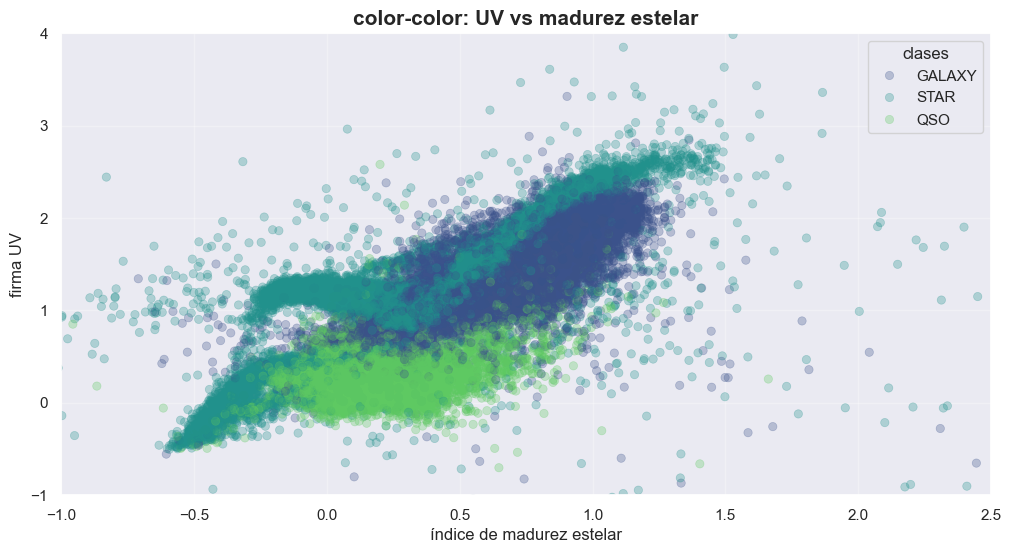

In [52]:
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_lim, 
    x="ÍndMadEst (g-r)", 
    y="Firma UV (u-g)", 
    hue="class", 
    alpha=0.3, 
    palette="viridis",
    edgecolor=None
)

plt.title("color-color: UV vs madurez estelar", fontsize=15, fontweight="bold")
plt.xlabel("índice de madurez estelar", fontsize=12)
plt.ylabel("firma UV", fontsize=12)

#    voy a ajustar los ejes porque por los outliers es imposible apreciar nada
plt.xlim(-1, 2.5)
plt.ylim(-1, 4)


plt.grid(True, alpha=0.3)
plt.legend(title="clases", loc="upper right")

plt.show()

Observamos mucha información en este gráfico, pero antes recordamos:
+ __`ÍndMadEst (g-r)`__: 
    + __valor negativo__: verde brilla más que rojo, indica que el objeto es __caliente y energético__ (long. onda cortas). Suelen presentarse en cuásares y en estrellas jóvenes.
    + __valor positivo__: rojo brilla más que verde, indica que el objeto es __frío y viejo__(long. onda largas).
    Suelen presentarse en galaxias elípticas viejas y estrellas enanas (ej.:enanas rojas)
+ UV: mayor UV, menor energía

Observamos por lo tanto:
+ UVs bajos (alta energía): mucha estrella jóven y, sobre todo, cuásares.
+ UVs medios(energía media): muchísimos cuásares muy energéticos, algunas galaxias calientes, muy pocas estrellas
+ UVs altos(baja energía):banda diferenciada de estrellas con alta energía, aunque muchas también con bajas energías y viejas. En este rango están la mayoria de galaxias. Tenemos menos galaxias jóvenes que viejas

Lo realmente llamativo es ver cómo pese a sufrir redshifts altísimos por las distancias masivas a las que se encuentran en comparación con las estrellas del estudio (dentro de la Vía Láctea), los valores UV de los cuásares son tan altos. __Tenemos estrellas muy cerca que en esencia no sufren el efecto de redshift brillando menos para nuestras lentes que objetos que se encuentran en el mismísimo límite del universo visible__ a más de 13,000 MILLONES (13,000,000,000) de AÑOS LUZ (13,000,000,000 años viajando a la velocidad de la luz). 

Es profundamente contraintuitivo que existan objetos así en el universo.

# <font color=red >__V. ANÁLISIS MULTIVARIANTE__

Entramos en la fase final del EDA. Vamos a analizar cómo fluctúan varias variables a la vez en el dataset.
Para ello vamos a hacer un pair plot entre varias variables que pueden servirnos para distinguir entre estrella, galaxia y cuásar:

+ `redshift`: ha sido la variable estrella de este EDA precisamente por aportar información muy rica sobre la física relativista y la naturaleza de los objetos. Nos sirve de localizador y permite saber si un objeto se acerca o aleja de nosotros, entre otras funciones.
+ `Firma UV`: nos ha permitido inspeccionar los niveles energéticos de los objetos. Comparándolo con redshift, podemos visualizar si un objeto con alta energía (bajo UV) tienen redshifts altos o bajos.
+ `Ìndice de madurez estelar`: Clasifica la población estelar, permitiendo ver si las galaxias rojas (baja energía) se agrupan de forma distinta a las azules (alta energía) en relación con su tamaño.
+ `Error Fotométrico`: lo usaremos como identificador de galaxias que es (altos errores fotométricos indican menor puntualidad, galaxias. Bajos indican puntualidad: estrellas y cuásares).

Buscamos que al relacionar todas estas variables encontremos clústeres diferenciados de galaxias, estrellas y cuásares, para identificarlos independientemente de la clase que el dataset nos diga que son. Si coinciden, "estamos de acuerdo" con el dataset. Si no, puede indicar que necesitamos información más completa y rica para llegar al punto de diferenciar objetos en este EDA.

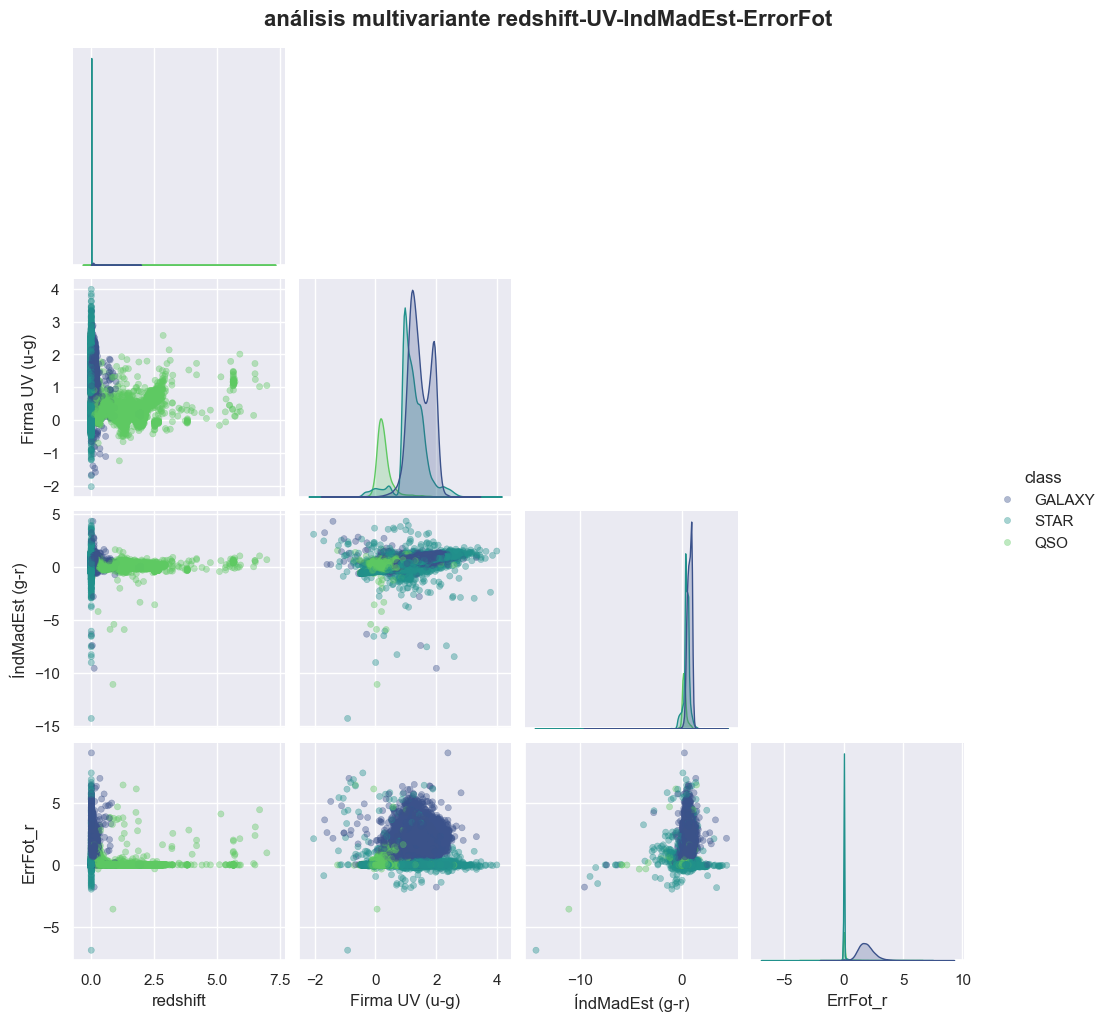

In [53]:
multivar = ['redshift', 'Firma UV (u-g)', 'ÍndMadEst (g-r)', 'ErrFot_r']

g= sns.pairplot(
    df_lim, 
    vars=multivar, 
    hue= 'class', 
    palette= 'viridis', 
    corner=True, 
    diag_kind= "kde",
    plot_kws={'alpha': 0.4,'s':20, 'edgecolor': None}
)

g.fig.suptitle("análisis multivariante redshift-UV-IndMadEst-ErrorFot", fontsize=16, fontweight='bold', y=1.02)
plt.show()

## __V.I. individualmente__

+ `redshift`
    + 0 es sinónimo de estrella, aunque puede haber galaxias con redshift ~0.
    + estrellas y cuásares presentan mayor dispersión y se pisan, pese a estar más extendidos y llegar a valores significativamente más altos los cuásares.

por sí misma no tiene capacidad discriminante, aunque el hecho que que __todas las estrellas ronden el 0__ es interesante, y combinada puede ser útil.

+ `Firma UV` 
    + cuásares destacan mucho en firmas UV muy bajas (son muy energéticos), aunque en esos mismos rangos también existen estrellas, que "manchan" la capacidad de discriminación de la métrica con estos objetos. Son estrellas cercanas, mucho menos energéticas que los cuásares, por lo que no sufren el efecto del redshift, asi que arrojan valores bajos de UV.
    + estrellas y galaxias ocupan valores UV muy similares, por lo que no podremos usar este filtro para discriminarlas.
esta variable nos podrá ayudar a __distinguir cuásares de no-cuásares__ combinada con otros filtros.

+ `Índice de madurez estelar`
    por orden de aparición en valores bajos, encontramos estrellas, cuásares y galaxias. Se solapan casi al completo, y la distribución acaba en lugares parecidos para las 3. 
    este fenómeno nos transmite la idea de que nom existen objetos intrínsecamente más antiguos que otros. Lo que si apreciamos es que, de media, los objetos más jóvenes que detectamos son las estrellas, seguidas de los cuásares y de las galaxias, con una vida media mayor.
    Estamos sesgados, ya que los cuásares que detectamos los detectamos precisamente por ser jóvenes y altamente energéticos, las estrellas que detectamos sólo estan en la Vía Láctea, y las galaxias que detectamos son más variadas.

    El sentido común (que muchas veces no funciona en astrofísica) nos dice que, probablemente, en la realidad y sin sesgos de detección como los que tenemos en estrellas y cuásares, la distribución de antiguedad será relativamente unifiorme independientemente del objeto en el universo por el mero hecho de que es isótropo y homogéneo.

+ `Error fotométrico`
    + cuásares y estrellas hacen pico en el mismo lugar (error ~0) por ser puntuales, las galaxias siguen una normal con media en ~1.6-1.7. esta variable es un __discriminador de galaxias__ muy eficiente.


## __V.II. dos a dos__

La lógica que vamos a aplicar es muy simple:
+ `error fot` distingue galaxias de no-galaxias
+ `firma UV` distingue cuásares de no-cuásares

### __A) ERROR VS FIRMA UV__

en principio, deberían de llevarse bien entre ellas. Observamos el gráfico:
+ para error=0
    encontramos casi exclusivamente cuásares y estrellas
    + si UV ~0, casi seguro cuásar
    + SI UV!=0, casi seguro estrella
+ para error>0
    + encontramos casi exclusivamente galaxias

Ya tenemos una `discriminación` muy importante y con un error aparentemente bajo:
+ __es estrella si error=0 y UV!=0__
+ __es cuásar si error=0 y UV=0__
+ __es galaxia si error!=0__    

### __B)ERROR VS REDSHIFT__

De la gráfica, nos quedamos con que:
+ redshift = ~0 es casi sinónimo de estrella 
+ redshift > ~0.25 es casi sinónimo de cuásar

+ error =0 sinónimo de cuásar/estrella
+ error!=0 sinónimo de galaxia/estrella

combinadas, obtenemos esta __`discriminación`__ aproximada:
+ __redshift 0 y error 0: estrella__
+ __redshift 0 y error <0: estrella__
+ __redshift 0 y error >0: estrella o galaxia__
+ __redshift!=0 y error =0: cuásar__
+ __redshift!=0 y error (0,~0.25): cuásar o galaxia__
+ __redshift !=0 y error > ~0.25: cuásar__

Es un __discriminador increíble para estrellas y cuásares__, ya que los deja solos para 3 combinaciones diferentes de las dos variables.

## __C) Resto de combinaciones__

O las hemos estudiado previamente en el EDA y no quiero duplicar conclusiones, o están muy dispersas las distribuciones por clase y no aportan información de valor en clave discriminatoria, como `índice madurez-firma UV`.

# __V.III.`redshift`, `firma UV` y `error`__

In [54]:
pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


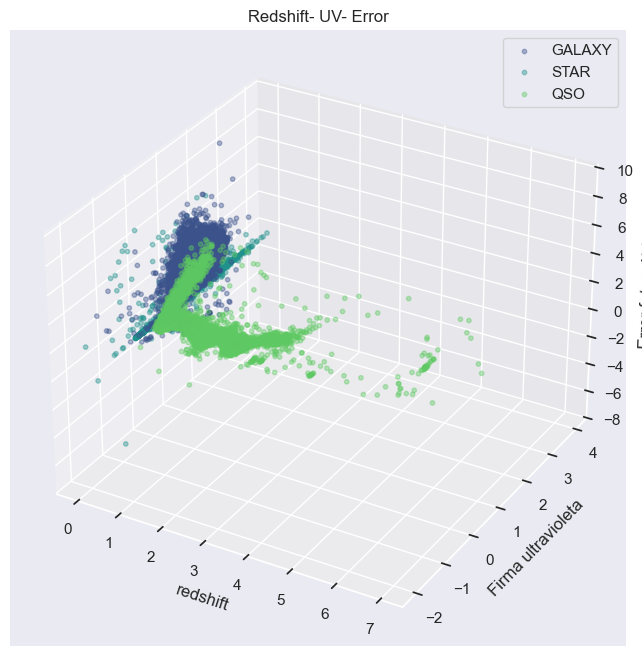

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure(figsize=(8,8))
ax= fig.add_subplot(111, projection='3d')

# como no puedo poner el comando de paleta VIRIDIS, he buscado los colores de la misma en internet
colores = {'GALAXY': '#3b528b', 'STAR': '#21918c', 'QSO': '#5ec962'}

for clase, color in colores.items():
    subset = df_lim[df_lim['class'] ==clase]
    ax.scatter(subset['redshift'], 
               subset['Firma UV (u-g)'], 
               subset['ErrFot_r'], 
               c=color, label=clase, alpha=0.4, s=10)

ax.set_xlabel('redshift')
ax.set_ylabel('Firma ultravioleta')
ax.set_zlabel('Error fotométrico')
ax.set_title('Redshift- UV- Error')
ax.legend()

plt.show()

Podemos apreciar varios fenómenos en la gráfica:
+ para empezar, estrellas y galaxias están distribuidas en una "rebanada" de la gráfica, redshift=0.
+ no obtenemos información que ya no tuviéramos antes en clave estrellas y galaxias, pero se aprecia que las segundas están concentradas alrededor de un punto en el que redshift=0, firma UV ~2.5 Y error fotométrico ~0; presentan bastante dispersión pero parece que el patrón es un círculo. Las estrellas forman un cigarro en redshift 0 y error fotométrico 0, con gran variedad de firmas UV presentes en la muestra
+ la gráfica si nos dice algo interesante sobre los cuásares. en redshifts bajos, parecen estar distribuidas alrededor del mismo punto que las galaxias, pero conforme redshift sube (a mayor distancia), tienden a pasar de estar concentradas alrededor de Firma UV =2 a firma UV=0, y a partir de ahí se distribuyen en forma de cigarro con una dispersión relativamente baja (al menos, más baja que las galaxias).

Esto tiene todo el sentido del mundo, ya que UV 2 es mucho menos energético que UV 0, y precisamente por eso __no podemos ver__ cuásares con UV menor a partir de cierto nivel de redshift, de ahí la forma en la que se "tuerce" nuestra distribución de cuásares.

Cabe destacar algo que ya hemos comentado antes sobre los objetos que estamos estudiando: no son el total de objetos que existen, son sólo los que vemos. El hecho de que la mayoría de cuásares que vemos tengan valores de firma UV 0 sólo significa eso, que __los que vemos__ tienen UV 0 (efecto de selección observacional) Esto mismo aplica a estrellas y galaxias, de las que ya hemos señalado el dominio que abarcan ante nuestros telescopios (están repartidos homogéneamente a gran escala, pero no podemos ver todos por el efecto de redshift, entre otros fenómenos físicos que limitan nuestra visión del universo).

Podemos concluir que `redshift- error fotométrico-firma UV` es un trío de variables muy útil en clave discriminatoria para las 3 clases de objeto con los que estamos trabajando.

# __VI.OUTLIERS__

Vamos a estudiar cómo se distribuyen los outliers en nuestras 4 variables clave del dataset: Error, redshift, UV e Índice de madurez estelar.

Vamos a centrarnos en el rango intercuartílico (IQR) para detectar outliers. Segmentaremos por clase, porque ya hemos visto cómo dependiendo del objeto la distribución y dispersión cambia, por lo que también cambiará la definición de outlier para cada una.

C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\3913740446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_lim, x= "class", y= var, palette= "viridis")
C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\3913740446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_lim, x= "class", y= var, palette= "viridis")
C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\3913740446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_lim, x= "class", y= var, palette= "viridis")
C:\Users\mrala\AppData\Local\Temp\ipykernel_18032

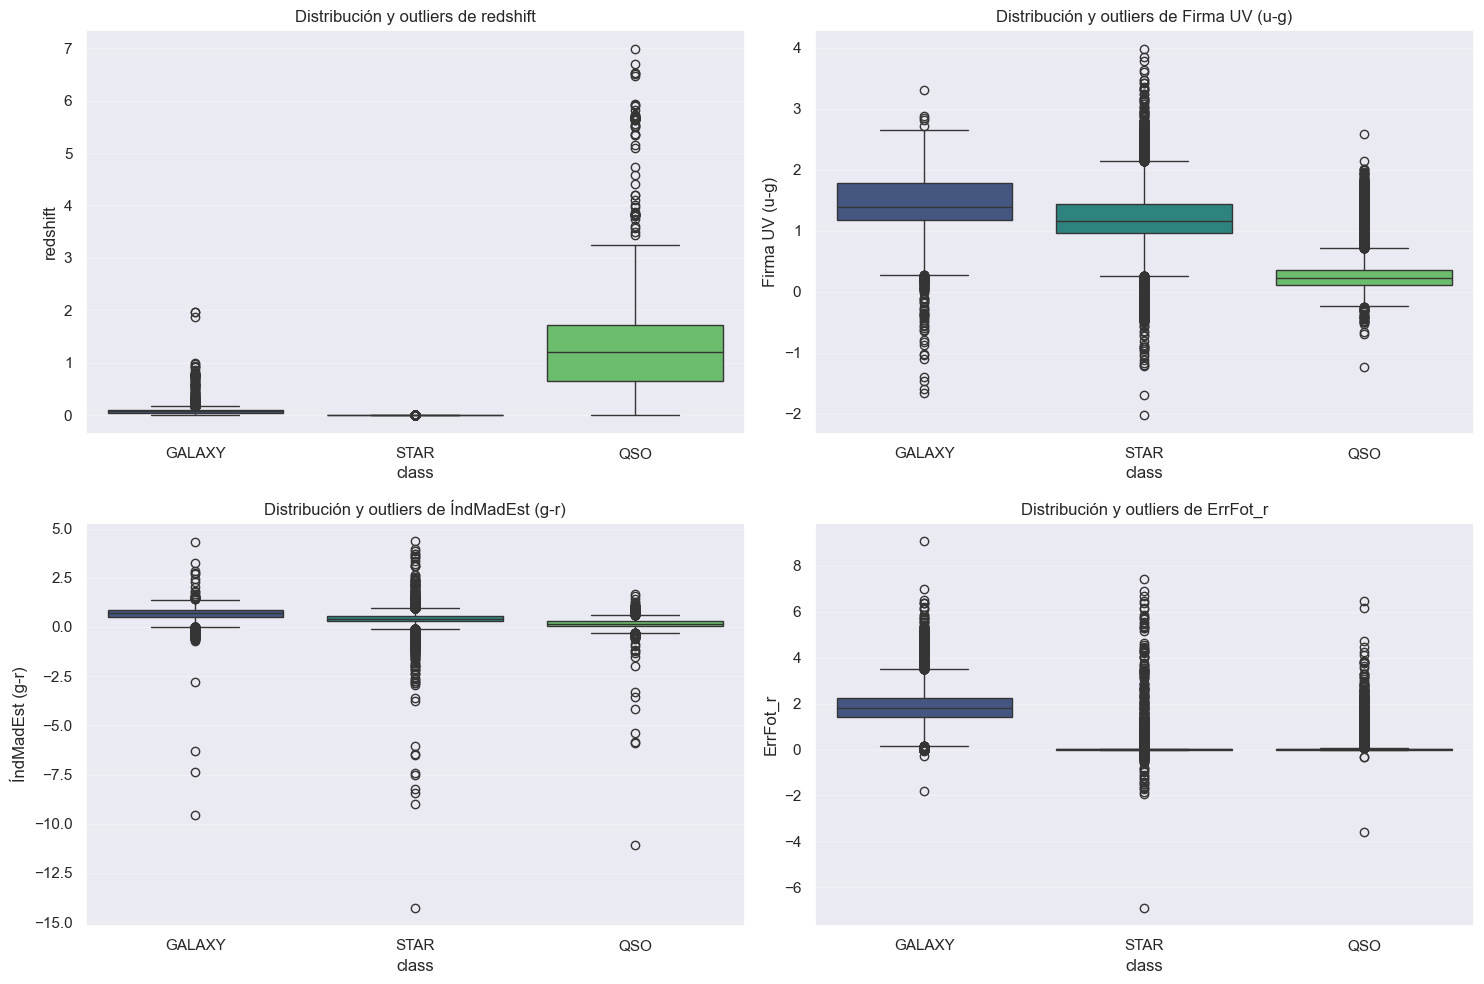

--- RESUMEN DE OUTLIERS DETECTADOS ---
     Clase         variable  N_outliers
0   GALAXY         redshift         871
1     STAR         redshift        3305
2      QSO         redshift          77
3   GALAXY   Firma UV (u-g)         103
4     STAR   Firma UV (u-g)        2777
5      QSO   Firma UV (u-g)         678
6   GALAXY  ÍndMadEst (g-r)         209
7     STAR  ÍndMadEst (g-r)        3314
8      QSO  ÍndMadEst (g-r)         626
9   GALAXY         ErrFot_r        1189
10    STAR         ErrFot_r        2508
11     QSO         ErrFot_r        1733


In [ ]:
vars_analisis = ["redshift", "Firma UV (u-g)", "ÍndMadEst (g-r)", "ErrFot_r"]

#   BOXPLOTS
plt.figure(figsize=(15, 10))

for i, var in enumerate(vars_analisis):
    plt.subplot(2,2, i+1)
    sns.boxplot(data=df_lim, x= "class", y= var, palette= "viridis")
    plt.title(f"Distribución y outliers de {var}")
    plt.grid(axis= "y", alpha =0.3)

plt.tight_layout()
plt.show()

# Contar outliers:
def identificar_outliers(df, columna):
    outliers_list = []
    for clase in df["class"].unique():
        data_clase = df[df["class"] == clase][columna]
        
        #   cuartiles e IQR
        Q1 = data_clase.quantile(0.25)
        Q3 = data_clase.quantile(0.75)
        IQR = Q3 - Q1
        
        #   límites (1.5x rango intercuartílico)
        bajo = Q1 - 1.5 * IQR
        alto = Q3 + 1.5 * IQR
        
        n_outliers = ((data_clase < bajo) | (data_clase > alto)).sum()
        
        outliers_list.append({
            "Clase": clase, 
            "variable": columna, 
            "N_outliers": n_outliers,
            "límite inferior": bajo,
            "límite superior": alto
        })
    return outliers_list

resumen_outliers = []
for var in vars_analisis:
    resumen_outliers.extend(identificar_outliers(df_lim, var))

df_reporte_outliers = pd.DataFrame(resumen_outliers)
print("--- RESUMEN DE OUTLIERS DETECTADOS ---")
print(df_reporte_outliers[["Clase", "variable", "N_outliers"]])

Para no llegar a conclusiones antes de tiempo, vamos a ver el total de outliers por clase en las 4 variables conjuntamente. Quiero detectar qué clase es la más "conflictiva" independientemente de la variable que estemos observando puntuialmente.

C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\2003063803.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_total_outliers, x="Clase", y="N_outliers", palette="viridis")


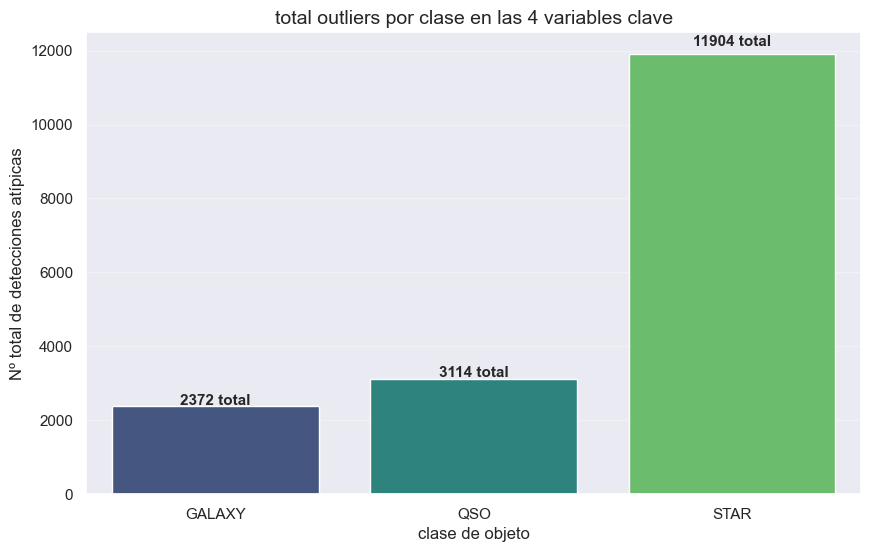

--- RESUMEN GLOBAL DE VALORES EXTREMOS---
 Clase  N_outliers  %_Outliers_Total
GALAXY        2372          4.543452
   QSO        3114         29.902055
  STAR       11904         32.006883


In [66]:
df_total_outliers = df_reporte_outliers.groupby("Clase")["N_outliers"].sum().reset_index()

total_registros_clase = df_lim["class"].value_counts().reset_index()
total_registros_clase.columns = ["Clase", "Total_Registros"]

df_total_outliers = df_total_outliers.merge(total_registros_clase, on="Clase")
df_total_outliers["%_Outliers_Total"] = (df_total_outliers ["N_outliers"] /df_total_outliers ["Total_Registros"])*100

plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_outliers, x="Clase", y="N_outliers", palette="viridis")

for i, row in df_total_outliers.iterrows():
    plt.text(i, row["N_outliers"] + (row["N_outliers"]*0.02), 
             f"{int(row['N_outliers'])} total", 
             ha="center", fontsize=11, fontweight="bold")

plt.title("total outliers por clase en las 4 variables clave", fontsize=14)
plt.ylabel("Nº total de detecciones atípicas")
plt.xlabel("clase de objeto")
plt.grid(axis="y", alpha=0.3)
plt.show()

print("--- RESUMEN GLOBAL DE VALORES EXTREMOS---")
print(df_total_outliers[["Clase", "N_outliers", "%_Outliers_Total"]].to_string(index=False))

Podemos apreciar que las estrellas son los objetos más conflictivos en estas 4 variables, pero este dato de 5 sobre el total de objetos es intrínsecamente engañoso, porque hemos unido 4 variables. puede que un objeto en concreto presente valores extremos en las 4, y cuente por 4 outliers. Para definir estos valores extremos voy a usar `Firma UV`, que nos habla de la naturaleza energética del objeto y destaca su caracter de "especial" respecto al resto. Aquí vamos a detectar objetos con energías altísimas o bajísimas, es decir, objetos o bien muy jóvenes o a punto de morir, o increíblemente energéticos independientemente de su edad.

C:\Users\mrala\AppData\Local\Temp\ipykernel_18032\468359214.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_reporte_uv, x="Clase", y="%_Outliers", palette="viridis")


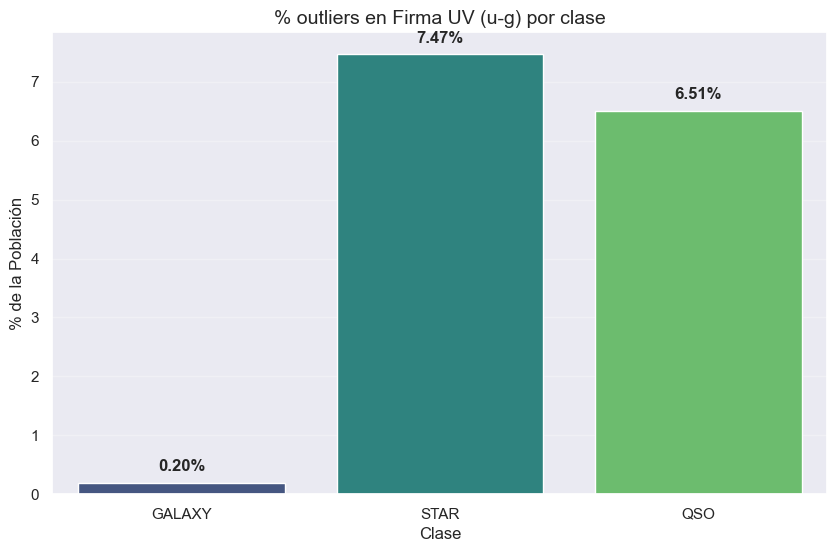

--- ANÁLISIS DE ATIPICIDAD: Firma UV (u-g) ---
 Clase  Outliers_UV  Total_Clase  %_Outliers
GALAXY          103        52207    0.197292
  STAR         2777        37192    7.466659
   QSO          678        10414    6.510467


In [69]:
variable_estudio = "Firma UV (u-g)"

reporte_uv = []

for clase in df_lim["class"].unique():
    df_clase = df_lim[df_lim["class"] == clase]
    
    Q1 = df_clase[variable_estudio].quantile(0.25)
    Q3 = df_clase[variable_estudio].quantile(0.75)
    IQR = Q3 - Q1
    
    bajo = Q1 - 1.5 * IQR
    alto = Q3 + 1.5 * IQR
    
    outliers = df_clase[(df_clase[variable_estudio] < bajo) | (df_clase[variable_estudio] > alto)]
    
    n_outliers = len(outliers)
    total_clase = len(df_clase)
    
    reporte_uv.append({
        "Clase": clase,
        "Outliers_UV": n_outliers,
        "Total_Clase": total_clase,
        "%_Outliers": (n_outliers / total_clase) * 100
    })

df_reporte_uv = pd.DataFrame(reporte_uv)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_reporte_uv, x="Clase", y="%_Outliers", palette="viridis")

for i, row in df_reporte_uv.iterrows():
    plt.text(i, row["%_Outliers"] + 0.2, f"{row['%_Outliers']:.2f}%", 
             ha="center", fontweight="bold")

plt.title(f"% outliers en {variable_estudio} por clase", fontsize=14)
plt.ylabel("% de la Población")
plt.grid(axis="y", alpha=0.3)
plt.show()

print(f"--- ANÁLISIS DE ATIPICIDAD: {variable_estudio} ---")
print(df_reporte_uv.to_string(index=False))

Ya con todos estos gráficos y tablas hechos, podemos sacar conclusiones:
todo apunta a que las estrellas son los objetos con más valores atípicos en % s/el total de objetos existentes en su clase.

aún así, las estrellas pueden presentar valores tan altos de outliers en UV por el mero hecho de estar muy cerca de nosotros, no porque sean ultraenergéticas.

Sin este sesgo, contamos con valores altísimos de cuásares outliers. Por la naturaleza de estos objetos, puede entenderse que presenten valores tan atípicos. 

las galaxias sin embargo parecen muy estables, presentan poco outlier en UV (También en la tabla anterior presentaban un 4-5% del total de objetos de su clase pese a ese error de medida en el que podemos tener 1 objeto que genere 4 outliers)

todo esto puede explicarse por pura naturaleza de cada objeto:
+ `estrellas`: literalmente bolas de fuego impulsadas por energía nuclear. Existen infinidad de estrellas de tamaños, formas y composición diferente.
+ `galaxias`: son conjuntos de estrellas en última instancia. Varían en forma, tamaño y masa, pero no presentan variabilidades tan altas de forma natural como las estrellas, por el mero hecho de que están hechas de estrellas. Es estadísticamente más difícil que una galaxia entera cambie su firma UV drásticamente, porque su brillo es la suma suavizada del brillo de su población estelar, y al ser una media, presentan valores poco extremos.
+ `cuásares`:núcleos extremadamente luminosos de galaxias distantes alimentados por un agujero negro en su centro. Al absorber materia de su entorno ( acreción), liberann cantidades masivas de energía en todo el espectro electromagnético, pudiendo llegar a brillar más que __billones__ de estrellas juntas. Como también son componentes de una galaxia, no ve sus características suavizadas por el efecto de la media que si presentan las galaxias, de ahí su variabilidad.


# VII. CONCLUSIÓN PERSONAL

Elaborar este EDA me ha parecido una experiencia tremendamente enriquecedora por el hecho de mezclar la especialidad que he elegido a nivel laboral con mi mayor pasión personal, la física.
Desde hace un año apropximadamente he estado formándome en cuántica y física de partículas a nivel divulgativo (sin física ni matemáticas duras de por medio), y el hecho de volver al área de la física que me hizo apasionarme por esa ciencia, la relativista, ha sido toda una experiencia.
Entender el redshift en profundidad y la estructura del universo para prepararme y hacer el EDA, y durante el transcurso del mismo, ha hecho que expanda mis conocimientos en la materia y me ha resultado muy edificante y genuinamente divertido.
Combinado con eso, el hecho de comprender cómo usar las librerías de gráficos y pandas en general me ha resultado también curioso por la naturaleza complementaria de los mismos. Creo que he entendido que lo que estamos usando en el máster a diario no son más que HERRAMIENTAS para complementar diferentes estudios de la realidad que nos rodea, y ha despertado en mí una necesidad de expandir mis conocimientos como data para comprender mejor el mundo en el que vivimos.